In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot3 as uproot
import pandas as pd
import numpy as np
import math
from tqdm import tqdm

import kdar_functions as kdar
import general_functions as utils

import importlib



In [3]:
single_run = True

In [4]:
importlib.reload(kdar)
importlib.reload(utils)

<module 'general_functions' from '/Users/bbogart/Documents/analysisCode/kdar_bdt/general_functions.py'>

In [5]:
ssm_bdt_vars = [
          "ssm_Nsm",
          "ssm_Nsm_wivtx",
          "ssm_dq_dx_fwd_1",
          "ssm_dq_dx_fwd_2",
          "ssm_dq_dx_fwd_3",
          "ssm_dq_dx_fwd_4",
          "ssm_dq_dx_fwd_5",
          "ssm_dq_dx_bck_1",
          "ssm_dq_dx_bck_2",
          "ssm_dq_dx_bck_3",
          "ssm_dq_dx_bck_4",
          "ssm_dq_dx_bck_5",
          "ssm_d_dq_dx_fwd_12",
          "ssm_d_dq_dx_fwd_23",
          "ssm_d_dq_dx_fwd_34",
          "ssm_d_dq_dx_fwd_45",
          "ssm_d_dq_dx_bck_12",
          "ssm_d_dq_dx_bck_23",
          "ssm_d_dq_dx_bck_34",
          "ssm_d_dq_dx_bck_45",
          "ssm_max_dq_dx_fwd_3",
          "ssm_max_dq_dx_fwd_5",
          "ssm_max_dq_dx_bck_3",
          "ssm_max_dq_dx_bck_5",
          "ssm_max_d_dq_dx_fwd_3",
          "ssm_max_d_dq_dx_fwd_5",
          "ssm_max_d_dq_dx_bck_3",
          "ssm_max_d_dq_dx_bck_5",
          "ssm_medium_dq_dx",
          "ssm_medium_dq_dx_bp",
          "ssm_angle_to_z",
          "ssm_angle_to_target",
          "ssm_angle_to_absorber",
          "ssm_angle_to_vertical",
          "ssm_x_dir",
          "ssm_y_dir",
          "ssm_z_dir",
          "ssm_kine_energy",
          "ssm_kine_energy_reduced",
          "ssm_vtx_activity",
          "ssm_pdg",
          "ssm_dQ_dx_cut",
          "ssm_score_mu_fwd",
          "ssm_score_p_fwd",
          "ssm_score_e_fwd",
          "ssm_score_mu_bck",
          "ssm_score_p_bck",
          "ssm_score_e_bck",
          "ssm_score_mu_fwd_bp",
          "ssm_score_p_fwd_bp",
          "ssm_score_e_fwd_bp",
          "ssm_length",
          "ssm_direct_length",
          "ssm_length_ratio",
          "ssm_max_dev",
          "ssm_n_prim_tracks_1",
          "ssm_n_prim_tracks_3",
          "ssm_n_prim_tracks_5",
          "ssm_n_prim_tracks_8",
          "ssm_n_prim_tracks_11",
          "ssm_n_all_tracks_1",
          "ssm_n_all_tracks_3",
          "ssm_n_all_tracks_5",
          "ssm_n_all_tracks_8",
          "ssm_n_all_tracks_11",
          "ssm_n_daughter_tracks_1",
          "ssm_n_daughter_tracks_3",
          "ssm_n_daughter_tracks_5",
          "ssm_n_daughter_tracks_8",
          "ssm_n_daughter_tracks_11",
          "ssm_n_daughter_all_1",
          "ssm_n_daughter_all_3",
          "ssm_n_daughter_all_5",
          "ssm_n_daughter_all_8",
          "ssm_n_daughter_all_11",
    
          "ssm_prim_track1_pdg",
          "ssm_prim_track1_score_mu_fwd",
          "ssm_prim_track1_score_p_fwd",
          "ssm_prim_track1_score_e_fwd",
          "ssm_prim_track1_score_mu_bck",
          "ssm_prim_track1_score_p_bck",
          "ssm_prim_track1_score_e_bck",
          "ssm_prim_track1_length",
          "ssm_prim_track1_direct_length",
          "ssm_prim_track1_length_ratio",
          "ssm_prim_track1_max_dev",
          "ssm_prim_track1_kine_energy_range",
          "ssm_prim_track1_kine_energy_range_mu",
          "ssm_prim_track1_kine_energy_range_p",
          "ssm_prim_track1_kine_energy_range_e",
          "ssm_prim_track1_kine_energy_cal",
          "ssm_prim_track1_medium_dq_dx",
          "ssm_prim_track1_x_dir",
          "ssm_prim_track1_y_dir",
          "ssm_prim_track1_z_dir",
          "ssm_prim_track1_add_daught_track_counts_1",
          "ssm_prim_track1_add_daught_all_counts_1",
          "ssm_prim_track1_add_daught_track_counts_5",
          "ssm_prim_track1_add_daught_all_counts_5",
          "ssm_prim_track1_add_daught_track_counts_11",
          "ssm_prim_track1_add_daught_all_counts_11",
    
          "ssm_prim_track2_pdg",
          "ssm_prim_track2_score_mu_fwd",
          "ssm_prim_track2_score_p_fwd",
          "ssm_prim_track2_score_e_fwd",
          "ssm_prim_track2_score_mu_bck",
          "ssm_prim_track2_score_p_bck",
          "ssm_prim_track2_score_e_bck",
          "ssm_prim_track2_length",
          "ssm_prim_track2_direct_length",
          "ssm_prim_track2_length_ratio",
          "ssm_prim_track2_max_dev",
          "ssm_prim_track2_kine_energy_range",
          "ssm_prim_track2_kine_energy_range_mu",
          "ssm_prim_track2_kine_energy_range_p",
          "ssm_prim_track2_kine_energy_range_e",
          "ssm_prim_track2_kine_energy_cal",
          "ssm_prim_track2_medium_dq_dx",
          "ssm_prim_track2_x_dir",
          "ssm_prim_track2_y_dir",
          "ssm_prim_track2_z_dir",
          "ssm_prim_track2_add_daught_track_counts_1",
          "ssm_prim_track2_add_daught_all_counts_1",
          "ssm_prim_track2_add_daught_track_counts_5",
          "ssm_prim_track2_add_daught_all_counts_5",
          "ssm_prim_track2_add_daught_track_counts_11",
          "ssm_prim_track2_add_daught_all_counts_11",
    
          "ssm_daught_track1_pdg",
          "ssm_daught_track1_score_mu_fwd",
          "ssm_daught_track1_score_p_fwd",
          "ssm_daught_track1_score_e_fwd",
          "ssm_daught_track1_score_mu_bck",
          "ssm_daught_track1_score_p_bck",
          "ssm_daught_track1_score_e_bck",
          "ssm_daught_track1_length",
          "ssm_daught_track1_direct_length",
          "ssm_daught_track1_length_ratio",
          "ssm_daught_track1_max_dev",
          "ssm_daught_track1_kine_energy_range",
          "ssm_daught_track1_kine_energy_range_mu",
          "ssm_daught_track1_kine_energy_range_p",
          "ssm_daught_track1_kine_energy_range_e",
          "ssm_daught_track1_kine_energy_cal",
          "ssm_daught_track1_medium_dq_dx",
          "ssm_daught_track1_x_dir",
          "ssm_daught_track1_y_dir",
          "ssm_daught_track1_z_dir",
          "ssm_daught_track1_add_daught_track_counts_1",
          "ssm_daught_track1_add_daught_all_counts_1",
          "ssm_daught_track1_add_daught_track_counts_5",
          "ssm_daught_track1_add_daught_all_counts_5",
          "ssm_daught_track1_add_daught_track_counts_11",
          "ssm_daught_track1_add_daught_all_counts_11",
    
          "ssm_daught_track2_pdg",
          "ssm_daught_track2_score_mu_fwd",
          "ssm_daught_track2_score_p_fwd",
          "ssm_daught_track2_score_e_fwd",
          "ssm_daught_track2_score_mu_bck",
          "ssm_daught_track2_score_p_bck",
          "ssm_daught_track2_score_e_bck",
          "ssm_daught_track2_length",
          "ssm_daught_track2_direct_length",
          "ssm_daught_track2_length_ratio",
          "ssm_daught_track2_max_dev",
          "ssm_daught_track2_kine_energy_range",
          "ssm_daught_track2_kine_energy_range_mu",
          "ssm_daught_track2_kine_energy_range_p",
          "ssm_daught_track2_kine_energy_range_e",
          "ssm_daught_track2_kine_energy_cal",
          "ssm_daught_track2_medium_dq_dx",
          "ssm_daught_track2_x_dir",
          "ssm_daught_track2_y_dir",
          "ssm_daught_track2_z_dir",
          "ssm_daught_track2_add_daught_track_counts_1",
          "ssm_daught_track2_add_daught_all_counts_1",
          "ssm_daught_track2_add_daught_track_counts_5",
          "ssm_daught_track2_add_daught_all_counts_5",
          "ssm_daught_track2_add_daught_track_counts_11",
          "ssm_daught_track2_add_daught_all_counts_11",
    
          "ssm_prim_shw1_pdg",
          "ssm_prim_shw1_score_mu_fwd",
          "ssm_prim_shw1_score_p_fwd",
          "ssm_prim_shw1_score_e_fwd",
          "ssm_prim_shw1_score_mu_bck",
          "ssm_prim_shw1_score_p_bck",
          "ssm_prim_shw1_score_e_bck",
          "ssm_prim_shw1_length",
          "ssm_prim_shw1_direct_length",
          "ssm_prim_shw1_length_ratio",
          "ssm_prim_shw1_max_dev",
          "ssm_prim_shw1_kine_energy_range",
          "ssm_prim_shw1_kine_energy_range_mu",
          "ssm_prim_shw1_kine_energy_range_p",
          "ssm_prim_shw1_kine_energy_range_e",
          "ssm_prim_shw1_kine_energy_cal",
          'ssm_prim_shw1_kine_energy_best',
          "ssm_prim_shw1_medium_dq_dx",
          "ssm_prim_shw1_x_dir",
          "ssm_prim_shw1_y_dir",
          "ssm_prim_shw1_z_dir",
          "ssm_prim_shw1_add_daught_track_counts_1",
          "ssm_prim_shw1_add_daught_all_counts_1",
          "ssm_prim_shw1_add_daught_track_counts_5",
          "ssm_prim_shw1_add_daught_all_counts_5",
          "ssm_prim_shw1_add_daught_track_counts_11",
          "ssm_prim_shw1_add_daught_all_counts_11",
    
          "ssm_prim_shw2_pdg",
          "ssm_prim_shw2_score_mu_fwd",
          "ssm_prim_shw2_score_p_fwd",
          "ssm_prim_shw2_score_e_fwd",
          "ssm_prim_shw2_score_mu_bck",
          "ssm_prim_shw2_score_p_bck",
          "ssm_prim_shw2_score_e_bck",
          "ssm_prim_shw2_length",
          "ssm_prim_shw2_direct_length",
          "ssm_prim_shw2_length_ratio",
          "ssm_prim_shw2_max_dev",
          "ssm_prim_shw2_kine_energy_range",
          "ssm_prim_shw2_kine_energy_range_mu",
          "ssm_prim_shw2_kine_energy_range_p",
          "ssm_prim_shw2_kine_energy_range_e",
          "ssm_prim_shw2_kine_energy_cal",
          'ssm_prim_shw2_kine_energy_best',
          "ssm_prim_shw2_medium_dq_dx",
          "ssm_prim_shw2_x_dir",
          "ssm_prim_shw2_y_dir",
          "ssm_prim_shw2_z_dir",
          "ssm_prim_shw2_add_daught_track_counts_1",
          "ssm_prim_shw2_add_daught_all_counts_1",
          "ssm_prim_shw2_add_daught_track_counts_5",
          "ssm_prim_shw2_add_daught_all_counts_5",
          "ssm_prim_shw2_add_daught_track_counts_11",
          "ssm_prim_shw2_add_daught_all_counts_11",
    
          "ssm_daught_shw1_pdg",
          "ssm_daught_shw1_score_mu_fwd",
          "ssm_daught_shw1_score_p_fwd",
          "ssm_daught_shw1_score_e_fwd",
          "ssm_daught_shw1_score_mu_bck",
          "ssm_daught_shw1_score_p_bck",
          "ssm_daught_shw1_score_e_bck",
          "ssm_daught_shw1_length",
          "ssm_daught_shw1_direct_length",
          "ssm_daught_shw1_length_ratio",
          "ssm_daught_shw1_max_dev",
          "ssm_daught_shw1_kine_energy_range",
          "ssm_daught_shw1_kine_energy_range_mu",
          "ssm_daught_shw1_kine_energy_range_p",
          "ssm_daught_shw1_kine_energy_range_e",
          "ssm_daught_shw1_kine_energy_cal",
          'ssm_daught_shw1_kine_energy_best',
          "ssm_daught_shw1_medium_dq_dx",
          "ssm_daught_shw1_x_dir",
          "ssm_daught_shw1_y_dir",
          "ssm_daught_shw1_z_dir",
          "ssm_daught_shw1_add_daught_track_counts_1",
          "ssm_daught_shw1_add_daught_all_counts_1",
          "ssm_daught_shw1_add_daught_track_counts_5",
          "ssm_daught_shw1_add_daught_all_counts_5",
          "ssm_daught_shw1_add_daught_track_counts_11",
          "ssm_daught_shw1_add_daught_all_counts_11",
    
          "ssm_daught_shw2_pdg",
          "ssm_daught_shw2_score_mu_fwd",
          "ssm_daught_shw2_score_p_fwd",
          "ssm_daught_shw2_score_e_fwd",
          "ssm_daught_shw2_score_mu_bck",
          "ssm_daught_shw2_score_p_bck",
          "ssm_daught_shw2_score_e_bck",
          "ssm_daught_shw2_length",
          "ssm_daught_shw2_direct_length",
          "ssm_daught_shw2_length_ratio",
          "ssm_daught_shw2_max_dev",
          "ssm_daught_shw2_kine_energy_range",
          "ssm_daught_shw2_kine_energy_range_mu",
          "ssm_daught_shw2_kine_energy_range_p",
          "ssm_daught_shw2_kine_energy_range_e",
          "ssm_daught_shw2_kine_energy_cal",
          'ssm_daught_shw2_kine_energy_best',
          "ssm_daught_shw2_medium_dq_dx",
          "ssm_daught_shw2_x_dir",
          "ssm_daught_shw2_y_dir",
          "ssm_daught_shw2_z_dir",
          "ssm_daught_shw2_add_daught_track_counts_1",
          "ssm_daught_shw2_add_daught_all_counts_1",
          "ssm_daught_shw2_add_daught_track_counts_5",
          "ssm_daught_shw2_add_daught_all_counts_5",
          "ssm_daught_shw2_add_daught_track_counts_11",
          "ssm_daught_shw2_add_daught_all_counts_11",
    
          "ssm_nu_angle_z",
          "ssm_nu_angle_target",
          "ssm_nu_angle_absorber",
          "ssm_nu_angle_vertical",
          "ssm_prim_nu_angle_z",
          "ssm_prim_nu_angle_target",
          "ssm_prim_nu_angle_absorber",
          "ssm_prim_nu_angle_vertical",
          "ssm_con_nu_angle_z",
          "ssm_con_nu_angle_target",
          "ssm_con_nu_angle_absorber",
          "ssm_con_nu_angle_vertical",
          "ssm_track_angle_z",
          "ssm_track_angle_target",
          "ssm_track_angle_absorber",
          "ssm_track_angle_vertical",
          "ssm_vtxX",
          "ssm_vtxY",
          "ssm_vtxZ",

          "ssm_offvtx_length",
          "ssm_offvtx_energy",
          "ssm_n_offvtx_tracks_1",
          "ssm_n_offvtx_tracks_3",
          "ssm_n_offvtx_tracks_5",
          "ssm_n_offvtx_tracks_8",
          "ssm_n_offvtx_tracks_11",
          "ssm_n_offvtx_showers_1",
          "ssm_n_offvtx_showers_3",
          "ssm_n_offvtx_showers_5",
          "ssm_n_offvtx_showers_8",
          "ssm_n_offvtx_showers_11",
          "ssm_offvtx_track1_pdg",
          "ssm_offvtx_track1_score_mu_fwd",
          "ssm_offvtx_track1_score_p_fwd",
          "ssm_offvtx_track1_score_e_fwd",
          "ssm_offvtx_track1_score_mu_bck",
          "ssm_offvtx_track1_score_p_bck",
          "ssm_offvtx_track1_score_e_bck",
          "ssm_offvtx_track1_length",
          "ssm_offvtx_track1_direct_length",
          "ssm_offvtx_track1_max_dev",
          "ssm_offvtx_track1_kine_energy_range",
          "ssm_offvtx_track1_kine_energy_range_mu",
          "ssm_offvtx_track1_kine_energy_range_p",
          "ssm_offvtx_track1_kine_energy_range_e",
          "ssm_offvtx_track1_kine_energy_cal",
          "ssm_offvtx_track1_medium_dq_dx",
          "ssm_offvtx_track1_x_dir",
          "ssm_offvtx_track1_y_dir",
          "ssm_offvtx_track1_z_dir",
          "ssm_offvtx_track1_dist_mainvtx",
          "ssm_offvtx_shw1_pdg_offvtx",
          "ssm_offvtx_shw1_score_mu_fwd",
          "ssm_offvtx_shw1_score_p_fwd",
          "ssm_offvtx_shw1_score_e_fwd",
          "ssm_offvtx_shw1_score_mu_bck",
          "ssm_offvtx_shw1_score_p_bck",
          "ssm_offvtx_shw1_score_e_bck",
          "ssm_offvtx_shw1_length",
          "ssm_offvtx_shw1_direct_length",
          "ssm_offvtx_shw1_max_dev",
          "ssm_offvtx_shw1_kine_energy_best",
          "ssm_offvtx_shw1_kine_energy_range",
          "ssm_offvtx_shw1_kine_energy_range_mu",
          "ssm_offvtx_shw1_kine_energy_range_p",
          "ssm_offvtx_shw1_kine_energy_range_e",
          "ssm_offvtx_shw1_kine_energy_cal",
          "ssm_offvtx_shw1_medium_dq_dx",
          "ssm_offvtx_shw1_x_dir",
          "ssm_offvtx_shw1_y_dir",
          "ssm_offvtx_shw1_z_dir",
          "ssm_offvtx_shw1_dist_mainvtx",

          "ssm_kine_reco_Enu",
          "ssm_kine_reco_add_energy",
          "ssm_kine_energy_particle",
          "ssm_kine_energy_info",
          "ssm_kine_particle_type",
          "ssm_kine_energy_included",
          "ssm_kine_pio_mass",
          "ssm_kine_pio_flag",
          "ssm_kine_pio_vtx_dis",
          "ssm_kine_pio_energy_1",
          "ssm_kine_pio_theta_1",
          "ssm_kine_pio_phi_1",
          "ssm_kine_pio_dis_1",
          "ssm_kine_pio_energy_2",
          "ssm_kine_pio_theta_2",
          "ssm_kine_pio_phi_2",
          "ssm_kine_pio_dis_2",
          "ssm_kine_pio_angle",
          "ssm_numu_cc_flag",
          "ssm_cosmict_flag_1", 
          "ssm_cosmict_flag_2",  
          "ssm_cosmict_flag_3",  
          "ssm_cosmict_flag_4",  
          "ssm_cosmict_flag_5", 
          "ssm_cosmict_flag_6", 
          "ssm_cosmict_flag_7", 
          "ssm_cosmict_flag_8",  
          "ssm_cosmict_flag_9"
]


bdt_vars = [
    
    "mip_energy",
    "mip_angle_beam", 
    "spt_angle_vertical", 
    "numu_cc_3_track_length",
    "numu_cc_3_max_length_all",
    "cosmict_2_dQ_dx_front",
    "cosmict_2_dQ_dx_end",
    "cosmict_2_angle_beam",
    "cosmict_2_phi",
    "numu_cc_3_max_length",
    "numu_cc_3_max_muon_length",
    
    'cosmict_flag_1',
    'cosmict_flag_2',
    'cosmict_flag_3',
    'cosmict_flag_4',
    'cosmict_flag_5',
    'cosmict_flag_6',
    'cosmict_flag_7',
    'cosmict_flag_8',
    'cosmict_flag_9',
    'cosmict_flag_10',
    'cosmict_flag',
    "numu_score",
    "numu_cc_flag",
    "nue_score"
]

eval_vars = [
    "run",
    "subrun",
    "event",
    'flash_found', 
    'flash_time', 
    'flash_found_asInt', 'match_found_asInt', 
    'flash_measPe', 'flash_predPe', 
    'match_found', 'match_type', 'match_isFC', 'match_isTgm', 'match_notFC_FV', 'match_notFC_SP','match_notFC_DC', 'match_chargeU', 
    'match_chargeV', 'match_chargeY', 'match_energyY', 'light_mismatch', 'match_charge', 'match_energy', 
    'stm_eventtype', 'stm_lowenergy', 'stm_LM', 'stm_TGM', 'stm_STM', 'stm_FullDead', 'stm_clusterlength',
     ]

eval_mc_vars = ["truth_nuPdg","truth_isCC", 
                       'truth_energyInside','match_completeness_energy','truth_vtxInside'
                      ]


kine_vars = ["kine_particle_type", "kine_energy_particle", "kine_reco_add_energy", "kine_energy_info",
                 "kine_pio_mass",
                    "kine_pio_flag",
                    "kine_pio_vtx_dis",
                    "kine_pio_energy_1",
                    "kine_pio_theta_1",
                    "kine_pio_phi_1",
                    "kine_pio_dis_1",
                    "kine_pio_energy_2",
                    "kine_pio_theta_2",
                    "kine_pio_phi_2",
                    "kine_pio_dis_2",
                    "kine_pio_angle"]

kine_mc_vars = ["kine_reco_Enu"]

pf_eval_vars = ["reco_mother","reco_id","reco_pdg","reco_startMomentum",
           "reco_startXYZT","reco_endXYZT",
           "reco_nuvtxX","reco_nuvtxY","reco_nuvtxZ",
           "reco_Ntrack",
           "reco_muonMomentum",
           "reco_protonMomentum",
           "RWM_Time","PMT_TimeProp","PMT_Amp","PMT_Time","PMT_ID","evtTimeNS"]


pf_eval_mc_vars = [
    "truth_nuEnergy",
    "truth_nu_momentum",
    "truth_mother",
    "truth_id",
    "truth_pdg",
    "truth_startMomentum",
    "truth_muonMomentum",
    "truth_vtxX","truth_vtxY","truth_vtxZ","truth_startXYZT",
    #'evtTimeNS_cor',
    'mcflux_dk2gen','mcflux_gen2vtx',"mcflux_vx","mcflux_vy","mcflux_vz",
    "truth_nu_pos",'truth_nuTime',
    #'cor_nu_time','cor_nu_deltatime','cor_nu_time_nospill','cor_nu_time_spill'
]


In [6]:

presel_query = "ssm_kine_reco_Enu>10 and ssm_kine_reco_Enu<350 and match_isFC==1"
presel_query+= " and ssm_kine_pio_mass<50"
presel_query+= " and ssm_cosmict_flag_9==0"
presel_query+= " and ssm_E<270"
presel_query+= " and ssm_kine_energy>0"


In [7]:
def check_var(var,xmin,xmax,nbins,check_reco=False,xlabel_name="",clipped=False,logy=False):

    bins = np.linspace(xmin,xmax,nbins+1)
    err_truth = utils.get_x_err_Enu(utils.get_bin_centers(bins),bins)

    clipped_max =  99999999
    clipped_min = -99999999
    if clipped:
        clipped_max = xmax
        clipped_min = xmin       
    
    query = "is_KDAR==1"
    if check_reco: query = "is_KDAR==1 and " + presel_query
    sig_test, _xx = np.histogram(np.clip(kdar_overlay_df.query(query)[var].to_numpy(),clipped_min,clipped_max),
                                    bins=bins,density=False,
                                    weights=kdar_overlay_df.query(query)['net_weight'].to_numpy())
    norm_sig_test = np.sum(sig_test)
    sig_test = sig_test/norm_sig_test
    
    err_sig_test, _xx = np.histogram(np.clip(kdar_overlay_df.query(query)[var].to_numpy(),clipped_min,clipped_max),
                                    bins=bins,density=False,
                                    weights=pow(kdar_overlay_df.query(query)['net_weight'].to_numpy(),2))
    err_sig_test = np.sqrt(err_sig_test)/norm_sig_test
    
    
    sig_nuwro, _xx = np.histogram(np.clip(nuwro_df.query(query)[var].to_numpy(),clipped_min,clipped_max),
                                     bins=bins,density=False)
    norm_sig_nuwro = np.sum(sig_nuwro)
    err_sig_nuwro = sig_nuwro.copy()
    sig_nuwro = sig_nuwro/norm_sig_nuwro
    err_sig_nuwro = np.sqrt(err_sig_nuwro)/norm_sig_nuwro
    
    
    sig_gibuu, _xx = np.histogram(np.clip(gibuu_df.query(query)[var].to_numpy(),clipped_min,clipped_max),
                                    bins=bins,density=False,
                                    weights=gibuu_df.query(query)['net_weight'].to_numpy())
    norm_sig_gibuu = np.sum(sig_gibuu)
    sig_gibuu = sig_gibuu/norm_sig_gibuu
    
    err_sig_gibuu, _xx = np.histogram(np.clip(gibuu_df.query(query)[var].to_numpy(),clipped_min,clipped_max),
                                    bins=bins,density=False,
                                    weights=pow(gibuu_df.query(query)['net_weight'].to_numpy(),2))
    err_sig_gibuu = np.sqrt(err_sig_gibuu)/norm_sig_gibuu
    
    
    plt.figure()
    plt.errorbar(utils.get_bin_centers(bins),sig_test,xerr=err_truth,yerr=err_sig_test,label='GENIE', ms=0, fmt='o',lw=4,color='black')
    plt.errorbar(utils.get_bin_centers(bins),sig_nuwro,xerr=err_truth,yerr=err_sig_nuwro,label='NuWro', ms=0, fmt='o',lw=3,color='red')
    plt.errorbar(utils.get_bin_centers(bins),sig_gibuu,xerr=err_truth,yerr=err_sig_gibuu,label='GiBUU', ms=0, fmt='o',lw=2,color='dodgerblue')
    plt.xlabel(var)
    if xlabel_name!="": plt.xlabel(xlabel_name)
    plt.ylabel("Normalized Counts")
    plt.legend(title='Signal')
    if check_reco: plt.legend(title='Preselected Signal')
    plt.ylim(0,1.05*np.max([np.max(sig_test+err_sig_test),np.max(sig_nuwro+err_sig_nuwro),np.max(sig_gibuu+err_sig_gibuu)]))
    if logy: plt.yscale("log")
    plt.show()



In [8]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_UseGroundStateRemnant_kdar_overlay_run1_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
f_kdar_overlay_pot = f_kdar_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
kdar_overlay_POT = np.sum(f_kdar_overlay_pot["pot_tor875good"].to_numpy())
kdar_overlay_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_UseGroundStateRemnant_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    f_kdar_overlay_pot = f_kdar_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
    kdar_overlay_POT = np.sum(f_kdar_overlay_pot["pot_tor875good"].to_numpy())
    kdar_overlay_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine

    kdar_overlay_df = pd.concat([kdar_overlay_df, kdar_overlay_df_2], sort=False)

kdar_overlay_df = kdar.apply_goodruns(kdar_overlay_df)

kdar_overlay_df["net_weight"] = kdar_overlay_df["weight_cv"].to_numpy()*kdar_overlay_df["weight_spline"].to_numpy()
print("All events",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df["rse_num"] = (kdar_overlay_df["run"].to_numpy() * 100_000_000_000
                         + kdar_overlay_df["subrun"].to_numpy() * 1_000_000
                         + kdar_overlay_df["event"].to_numpy())
kdar_overlay_df = kdar_overlay_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df = kdar_overlay_df.query("truth_vtxInside==1")
print("In FV",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df["isEXT"] = [0 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["isDirt"] = [0 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["WC_file"] = ["numi_kdar_overlay" for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["POTscaled"] = [1 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["is_KDAR"] = [1 for i in range(kdar_overlay_df.shape[0])]

All events 42985 43598.727
Duplicates Dropped 42985 43598.727
In FV 40451 41028.164


In [9]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodnuwro_kdar_overlay_run4b_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
nuwro_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodnuwro_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    nuwro_df_2 = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine

    nuwro_df = pd.concat([nuwro_df, nuwro_df_2], sort=False)

nuwro_df = kdar.apply_goodruns(nuwro_df)

nuwro_df["net_weight"] = [1 for i in range(nuwro_df.shape[0])]
print("All events",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df["rse_num"] = (nuwro_df["run"].to_numpy() * 100_000_000_000
                         + nuwro_df["subrun"].to_numpy() * 1_000_000
                         + nuwro_df["event"].to_numpy())
nuwro_df = nuwro_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df = nuwro_df.query("truth_vtxInside==1")
print("In FV",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df["isEXT"] = [0 for i in range(nuwro_df.shape[0])]
nuwro_df["isDirt"] = [0 for i in range(nuwro_df.shape[0])]
nuwro_df["WC_file"] = ["numi_kdar_overlay" for i in range(nuwro_df.shape[0])]
nuwro_df["POTscaled"] = [1 for i in range(nuwro_df.shape[0])]
nuwro_df["is_KDAR"] = [1 for i in range(nuwro_df.shape[0])]


All events 43251 43251
Duplicates Dropped 43251 43251
In FV 17858 17858


In [10]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgibuu_kdar_overlay_run4b_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
gibuu_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgibuu_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    gibuu_df_2 = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine
    
    gibuu_df = pd.concat([gibuu_df, gibuu_df_2], sort=False)

gibuu_df = kdar.apply_goodruns(gibuu_df)

gibuu_df["net_weight"] = gibuu_df["truth_nuTime"].to_numpy()
print("All events",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df["rse_num"] = (gibuu_df["run"].to_numpy() * 100_000_000_000
                         + gibuu_df["subrun"].to_numpy() * 1_000_000
                         + gibuu_df["event"].to_numpy())
gibuu_df = gibuu_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df = gibuu_df.query("truth_vtxInside==1")
print("In FV",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df["isEXT"] = [0 for i in range(gibuu_df.shape[0])]
gibuu_df["isDirt"] = [0 for i in range(gibuu_df.shape[0])]
gibuu_df["WC_file"] = ["numi_kdar_overlay" for i in range(gibuu_df.shape[0])]
gibuu_df["POTscaled"] = [1 for i in range(gibuu_df.shape[0])]
gibuu_df["is_KDAR"] = [1 for i in range(gibuu_df.shape[0])]


All events 63174 0.0007441103
Duplicates Dropped 63174 0.0007441103
In FV 59515 0.0007040247


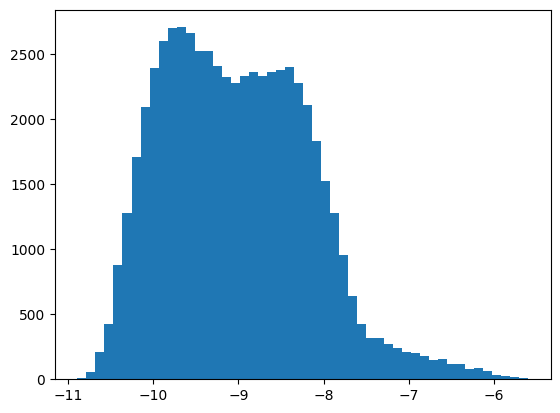

243.95696341773072
1.8154395e-05


In [11]:
plt.figure()
plt.hist(np.log10(gibuu_df["net_weight"].to_numpy()),bins=50)
plt.show()

print(np.sqrt(len(gibuu_df["net_weight"].to_numpy())))
print(np.sqrt(np.sum(gibuu_df["net_weight"].to_numpy()*gibuu_df["net_weight"].to_numpy())))

In [14]:
print(np.sqrt(len(gibuu_df["net_weight"].to_numpy()))/len(gibuu_df["net_weight"].to_numpy() ) )
print(np.sqrt(np.sum(gibuu_df["net_weight"].to_numpy()*gibuu_df["net_weight"].to_numpy()))/np.sum(gibuu_df["net_weight"].to_numpy()))

0.004099083649798046
0.025786588


In [19]:
1/0.004099083649798046/0.004099083649798046
print(len(gibuu_df["net_weight"].to_numpy()))

59515


In [17]:
1/0.025786588/0.025786588


1503.8767219534977

In [12]:

kdar_overlay_df = kdar.add_ntrue_nu_angle(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_muon_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_proton_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_ssm_info(kdar_overlay_df)

nuwro_df = kdar.add_ntrue_nu_angle(nuwro_df)
nuwro_df = kdar.add_truth_muon_info(nuwro_df)
nuwro_df = kdar.add_truth_proton_info(nuwro_df)
nuwro_df = kdar.add_truth_ssm_info(nuwro_df)

gibuu_df = kdar.add_ntrue_nu_angle(gibuu_df)
gibuu_df = kdar.add_truth_muon_info(gibuu_df)
gibuu_df = kdar.add_truth_proton_info(gibuu_df)
gibuu_df = kdar.add_truth_ssm_info(gibuu_df)


100%|██████████████████████████████████| 56674/56674 [00:00<00:00, 64758.13it/s]


In [13]:

kdar_overlay_df = kdar.add_ssm_kine_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_ssm_reco_proton_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_reco_proton_muon(kdar_overlay_df)
kdar_overlay_df = kdar.add_ssm_reco_dirt_vars(kdar_overlay_df)

nuwro_df = kdar.add_ssm_kine_info(nuwro_df)
nuwro_df = kdar.add_ssm_reco_proton_info(nuwro_df)
nuwro_df = kdar.add_reco_proton_muon(nuwro_df)
nuwro_df = kdar.add_ssm_reco_dirt_vars(nuwro_df)

gibuu_df = kdar.add_ssm_kine_info(gibuu_df)
gibuu_df = kdar.add_ssm_reco_proton_info(gibuu_df)
gibuu_df = kdar.add_reco_proton_muon(gibuu_df)
gibuu_df = kdar.add_ssm_reco_dirt_vars(gibuu_df)


100%|█████████████████████████████████| 38538/38538 [00:00<00:00, 167966.90it/s]
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:710: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["reco_muon_theta"] = mu_thetas
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:711: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["reco_muon_phi"] = mu_phis
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:712: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

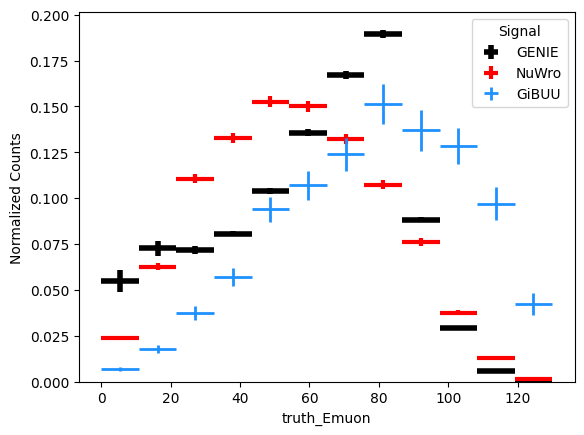

In [13]:
var = 'truth_Emuon'
xmin = 0
xmax = 130
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=False)


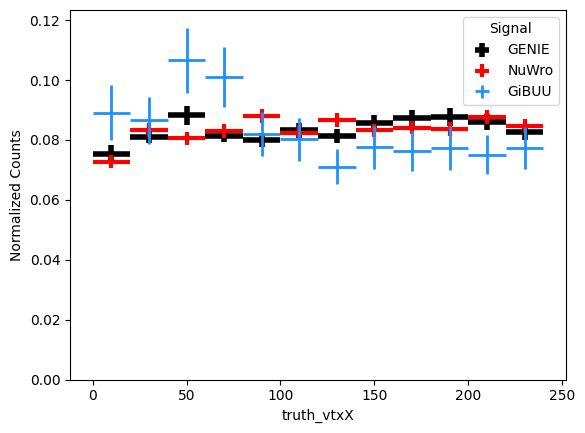

In [190]:
var = 'truth_vtxX'
xmin = 0
xmax = 240
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=False)

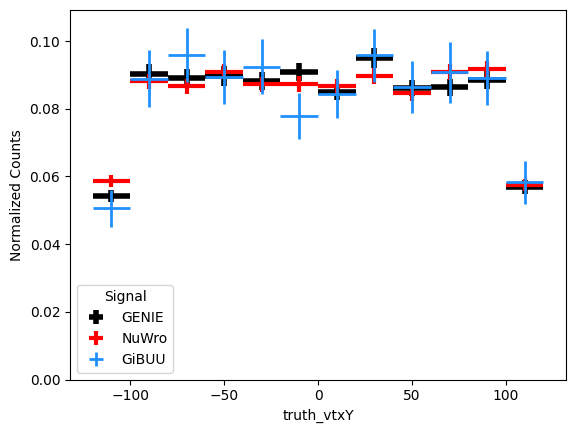

In [191]:
var = 'truth_vtxY'
xmin = -120
xmax = 120
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=False)

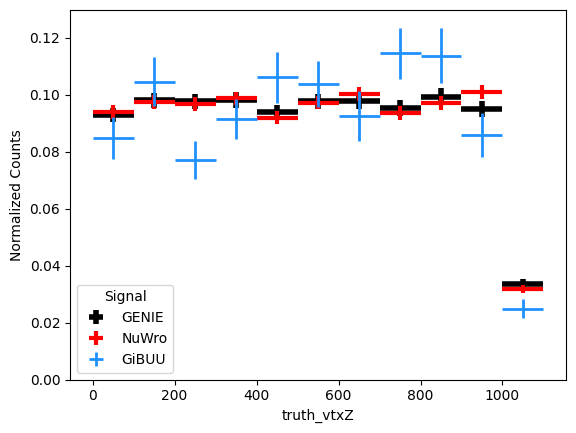

In [192]:
var = 'truth_vtxZ'
xmin = 0
xmax = 1100
nbins = 11
check_var(var,xmin,xmax,nbins,check_reco=False)

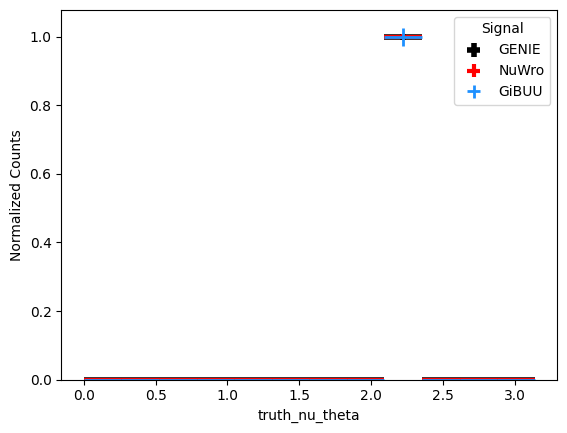

In [193]:
var = 'truth_nu_theta'
xmin = 0
xmax = 3.14
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=False)

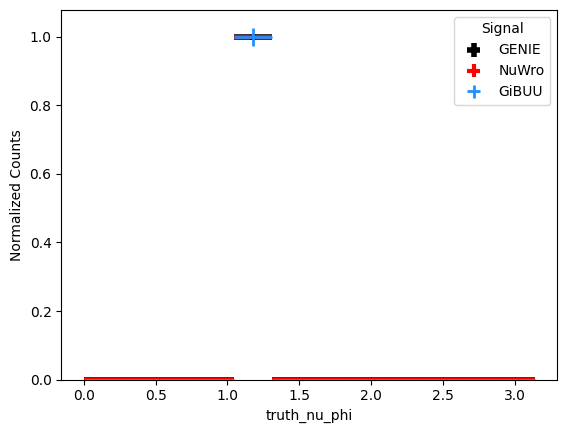

In [194]:
var = 'truth_nu_phi'
xmin = 0
xmax = 3.14
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=False)

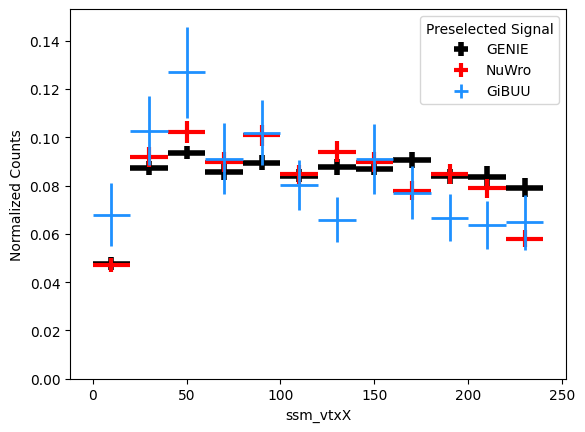

In [195]:
var = 'ssm_vtxX'
xmin = 0
xmax = 240
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=True)


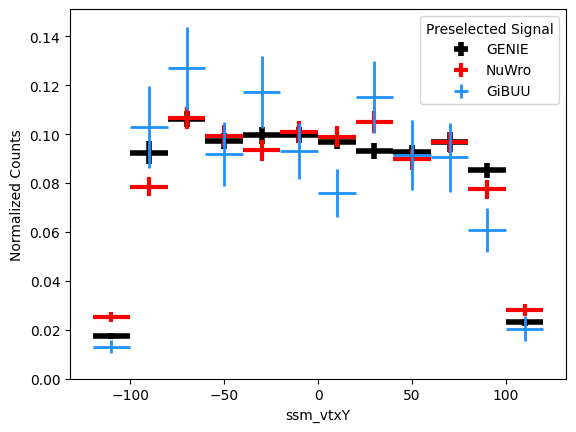

In [196]:
var = 'ssm_vtxY'
xmin = -120
xmax = 120
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=True)

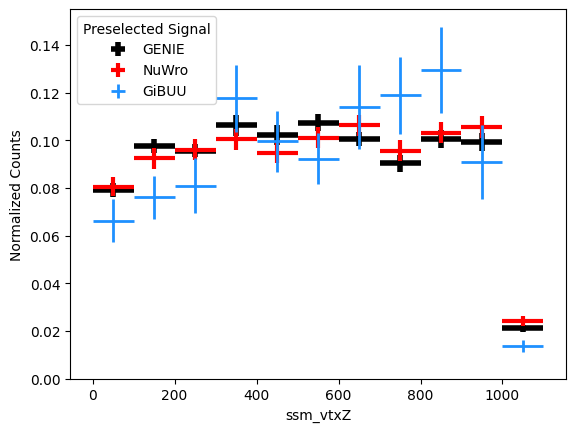

In [197]:
var = 'ssm_vtxZ'
xmin = 0
xmax = 1100
nbins = 11
check_var(var,xmin,xmax,nbins,check_reco=True)

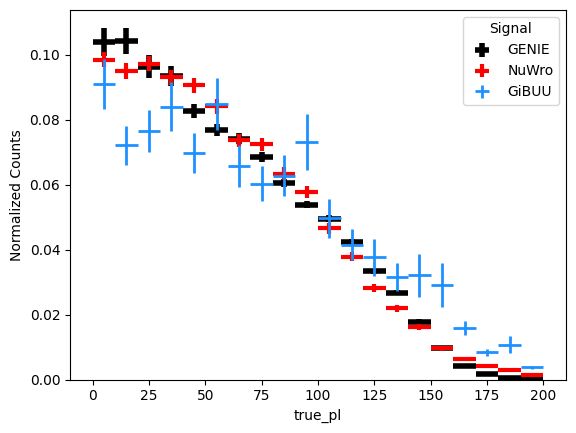

In [198]:
var = 'true_pl'
xmin = 0
xmax = 200
nbins = 20
check_var(var,xmin,xmax,nbins,check_reco=False)

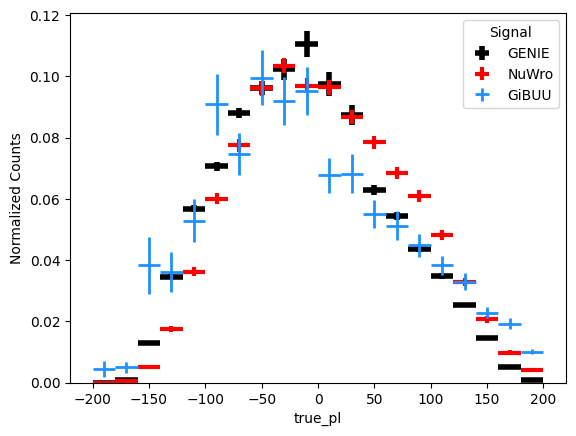

In [13]:
var = 'true_pl'
xmin = -200
xmax = 200
nbins = 20
check_var(var,xmin,xmax,nbins,check_reco=False)

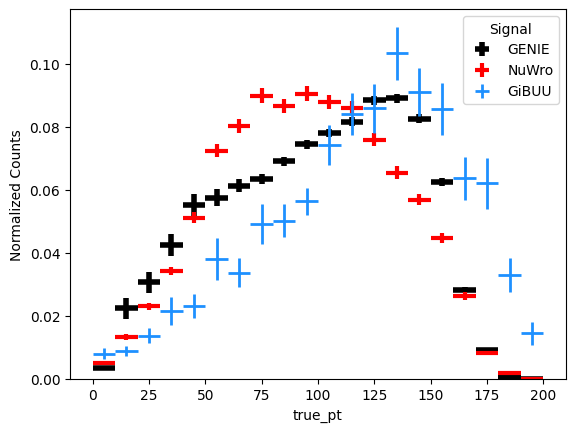

In [14]:
var = 'true_pt'
xmin = 0
xmax = 200
nbins = 20
check_var(var,xmin,xmax,nbins,check_reco=False)

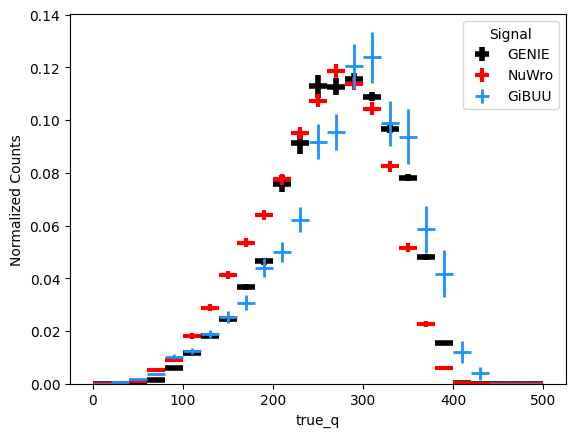

In [200]:
var = 'true_q'
xmin = 0
xmax = 500
nbins = 25
check_var(var,xmin,xmax,nbins,check_reco=False)

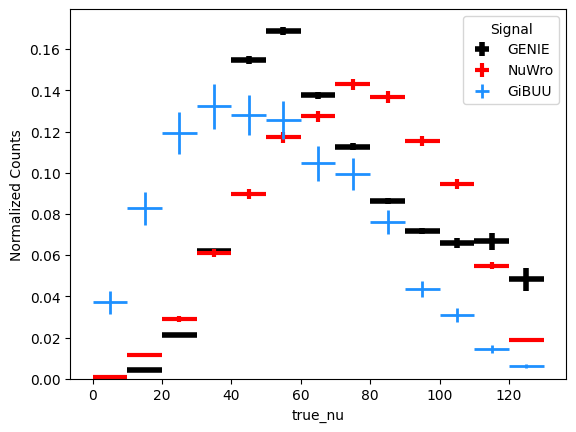

In [18]:
var = 'true_nu'
xmin = 0
xmax = 130
nbins = 26
check_var(var,xmin,xmax,nbins,check_reco=False)

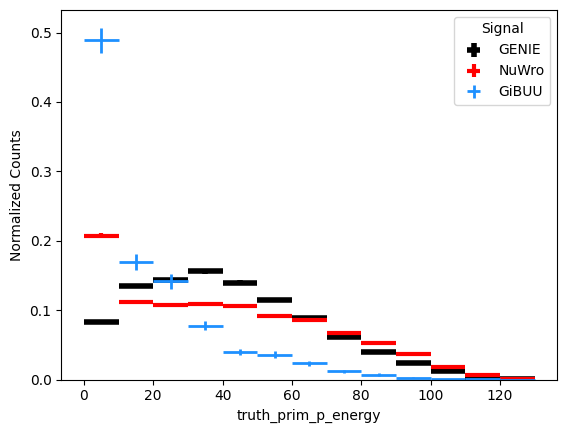

In [201]:
var = 'truth_prim_p_energy'
xmin = 0
xmax = 130
nbins = 13
check_var(var,xmin,xmax,nbins,check_reco=False)

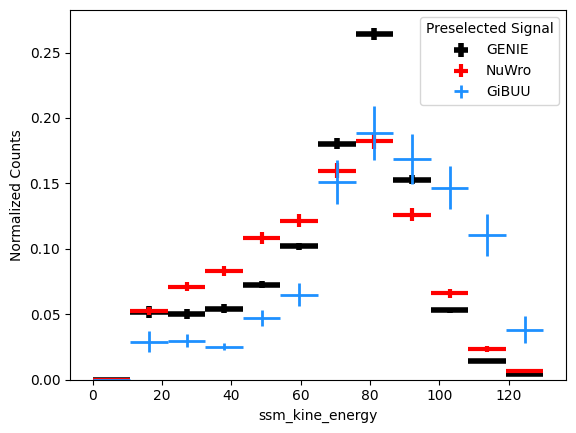

In [202]:
var = 'ssm_kine_energy'
xmin = 0
xmax = 130
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=True)


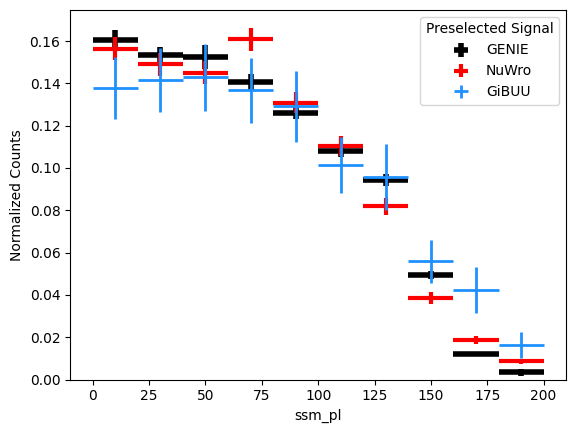

In [203]:
var = 'ssm_pl'
xmin = 0
xmax = 200
nbins = 10
check_var(var,xmin,xmax,nbins,check_reco=True)


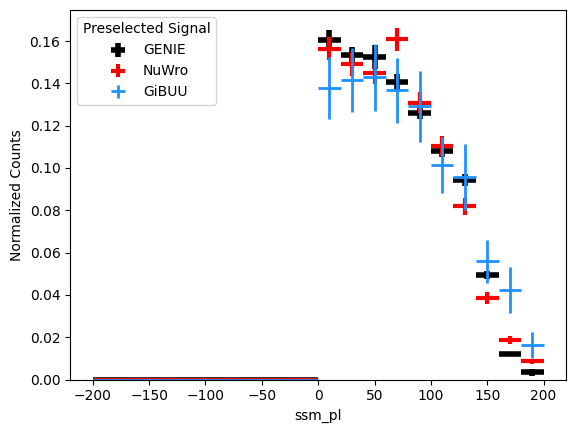

In [21]:
var = 'ssm_pl'
xmin = -200
xmax = 200
nbins = 20
check_var(var,xmin,xmax,nbins,check_reco=True)

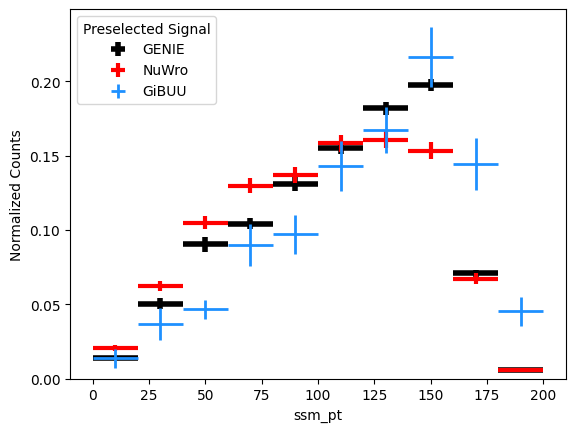

In [204]:
var = 'ssm_pt'
xmin = 0
xmax = 200
nbins = 10
check_var(var,xmin,xmax,nbins,check_reco=True)


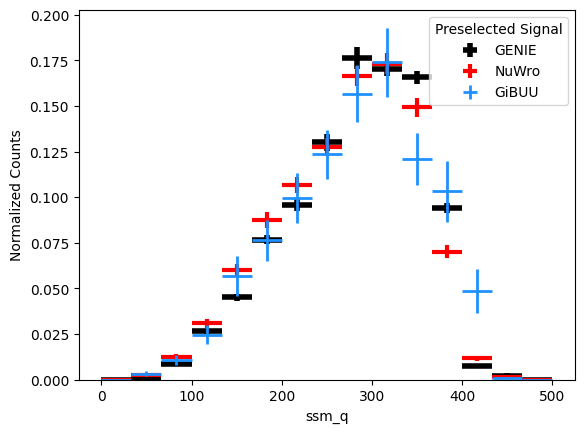

In [205]:
var = 'ssm_q'
xmin = 0
xmax = 500
nbins = 15
check_var(var,xmin,xmax,nbins,check_reco=True)


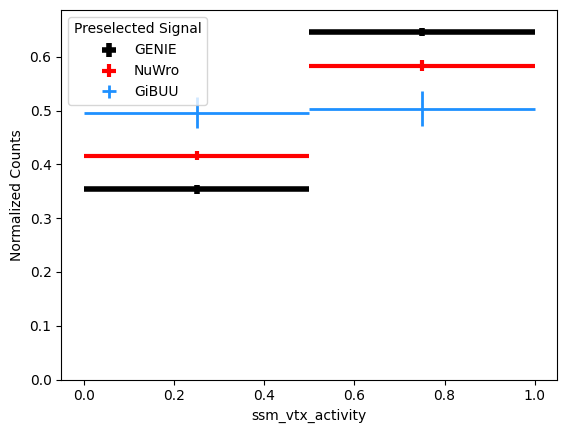

In [206]:
var = 'ssm_vtx_activity'
xmin = 0
xmax = 1
nbins = 2
check_var(var,xmin,xmax,nbins,check_reco=True)

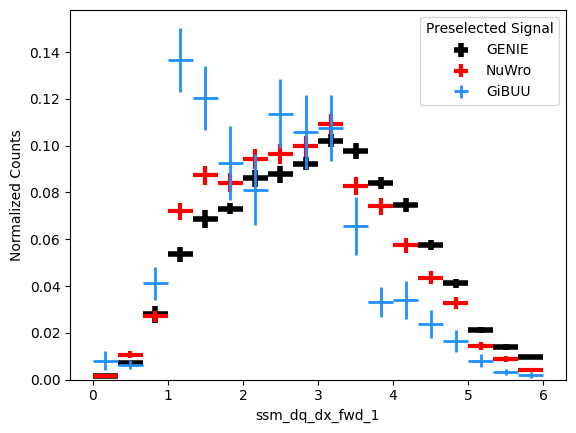

In [207]:
var = 'ssm_dq_dx_fwd_1'
xmin = 0
xmax = 6
nbins = 18
check_var(var,xmin,xmax,nbins,check_reco=True)

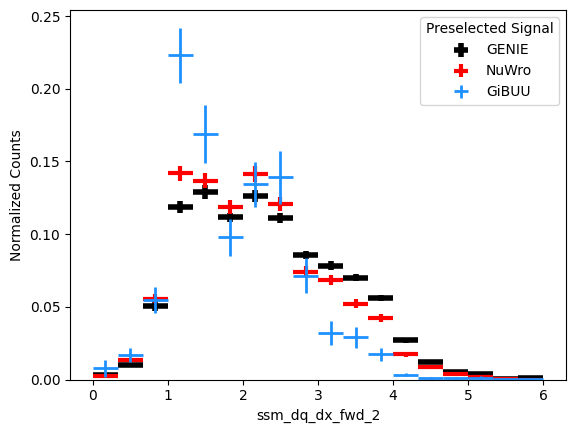

In [208]:
var = 'ssm_dq_dx_fwd_2'
xmin = 0
xmax = 6
nbins = 18
check_var(var,xmin,xmax,nbins,check_reco=True)

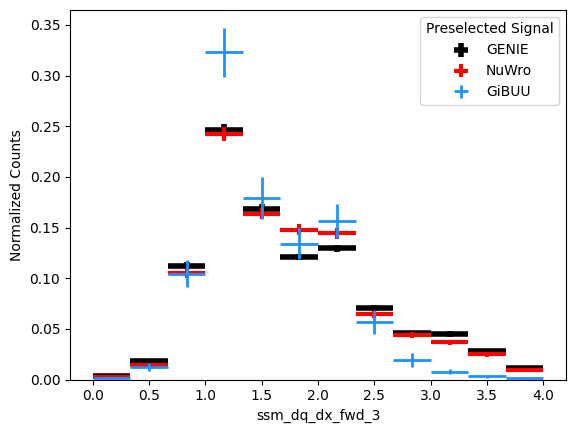

In [209]:
var = 'ssm_dq_dx_fwd_3'
xmin = 0
xmax = 4
nbins = 12
check_var(var,xmin,xmax,nbins,check_reco=True)

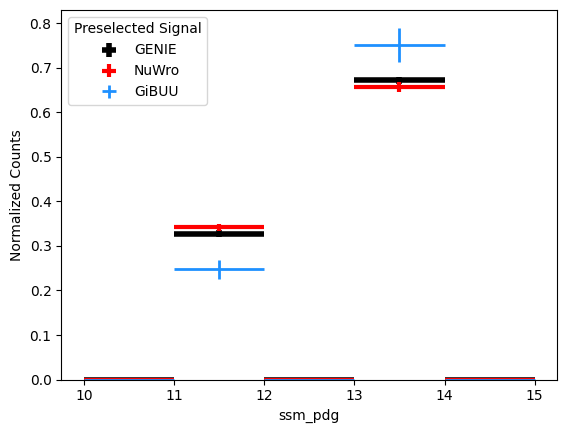

In [210]:
var = 'ssm_pdg'
xmin = 10
xmax = 15
nbins = 5
check_var(var,xmin,xmax,nbins,check_reco=True)

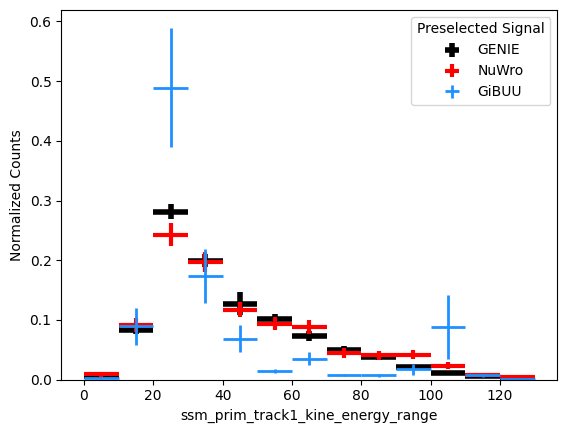

In [211]:
var = 'ssm_prim_track1_kine_energy_range'
xmin = 0
xmax = 130
nbins = 13
check_var(var,xmin,xmax,nbins,check_reco=True)

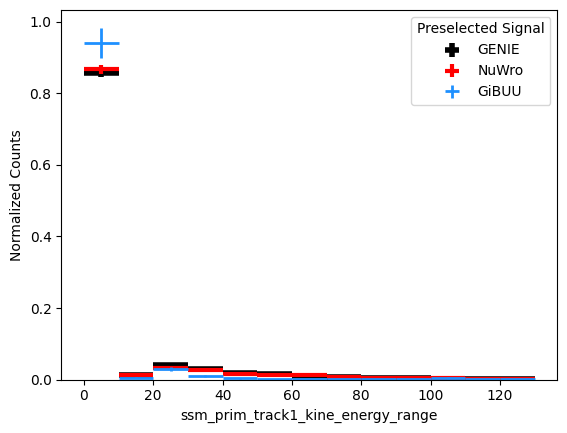

In [212]:
var = 'ssm_prim_track1_kine_energy_range'
xmin = 0
xmax = 130
nbins = 13
check_var(var,xmin,xmax,nbins,check_reco=True,clipped=True)

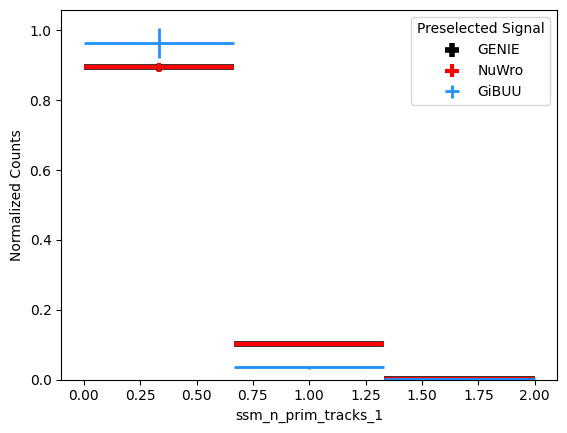

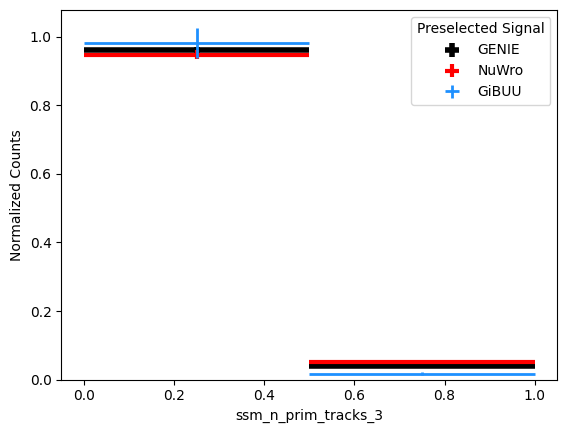

In [213]:
var = 'ssm_n_prim_tracks_1'
xmin = 0
xmax = 2
nbins = 3
check_var(var,xmin,xmax,nbins,check_reco=True)
var = 'ssm_n_prim_tracks_3'
xmin = 0
xmax = 1
nbins = 2
check_var(var,xmin,xmax,nbins,check_reco=True)

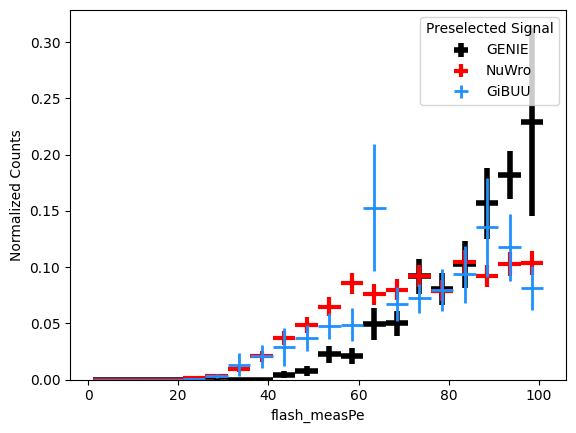

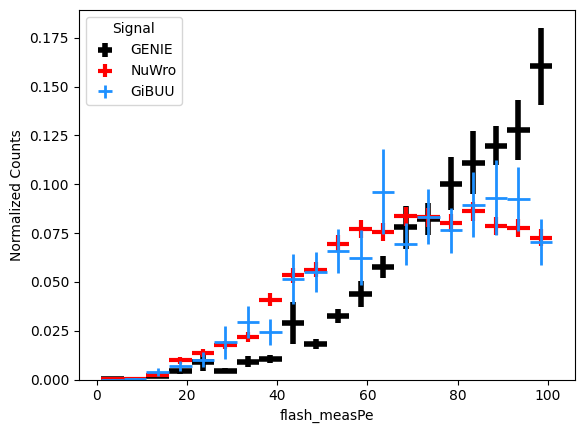

In [17]:
var = 'flash_measPe'
xmin = 1
xmax = 101
nbins = 20
check_var(var,xmin,xmax,nbins,check_reco=True)
check_var(var,xmin,xmax,nbins,check_reco=False)

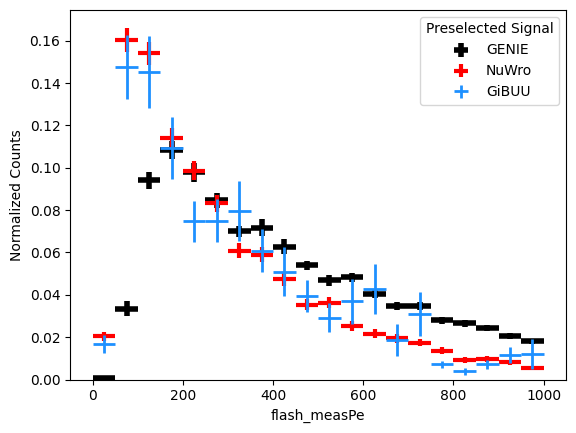

In [15]:
var = 'flash_measPe'
xmin = 0
xmax = 1000
nbins = 20
check_var(var,xmin,xmax,nbins,check_reco=True)

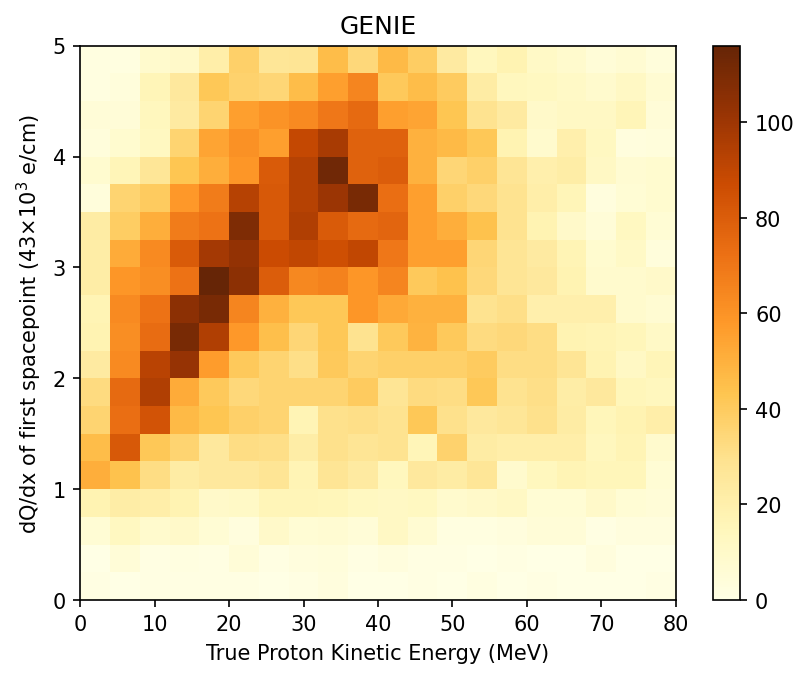

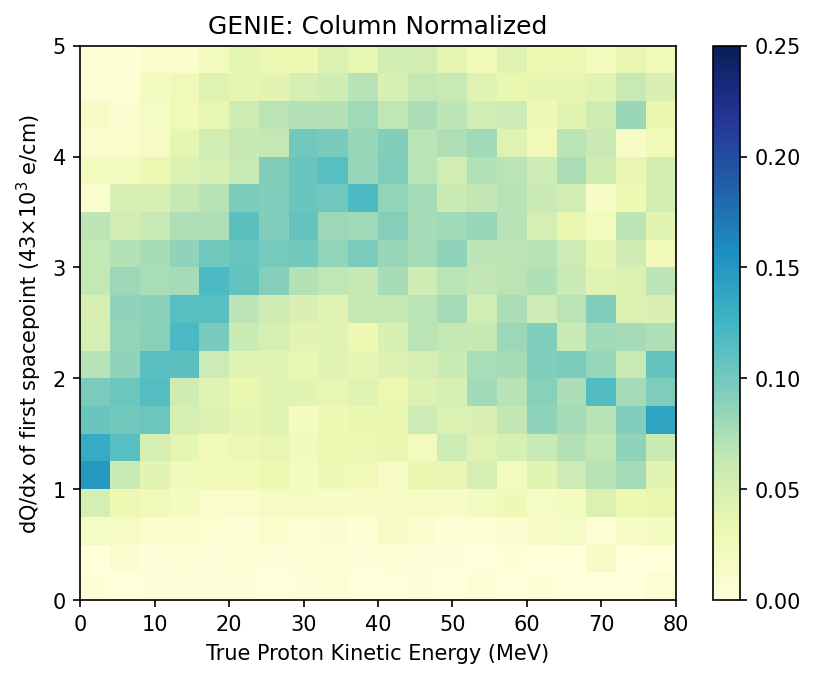

In [34]:
xmin = 0
xmax = 5
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_dq_dx_fwd_1"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(0):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"dQ/dx of first spacepoint (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.3)
    plt.colorbar(c)
    plt.xlabel(r"dQ/dx of first spacepoint (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"dQ/dx of first spacepoint (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"dQ/dx of first spacepoint (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

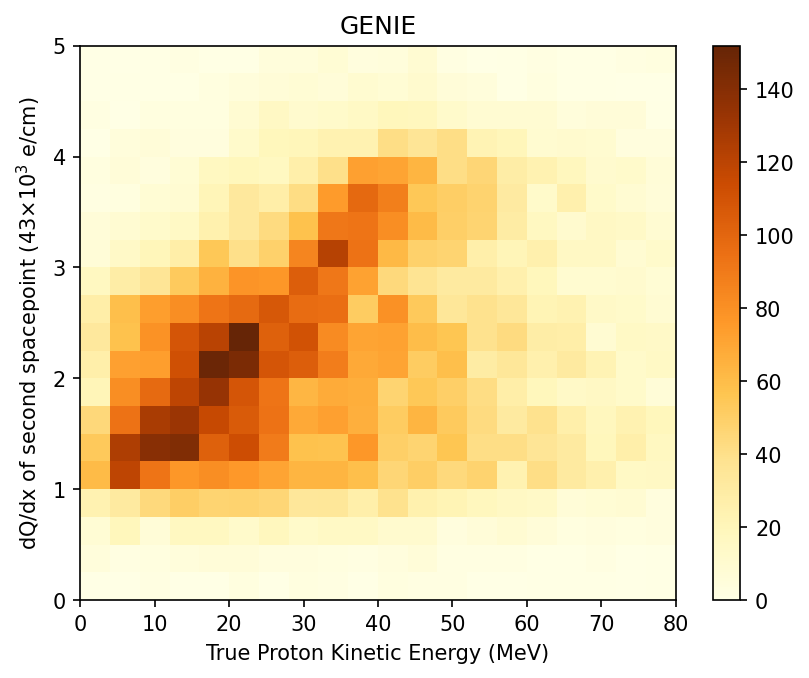

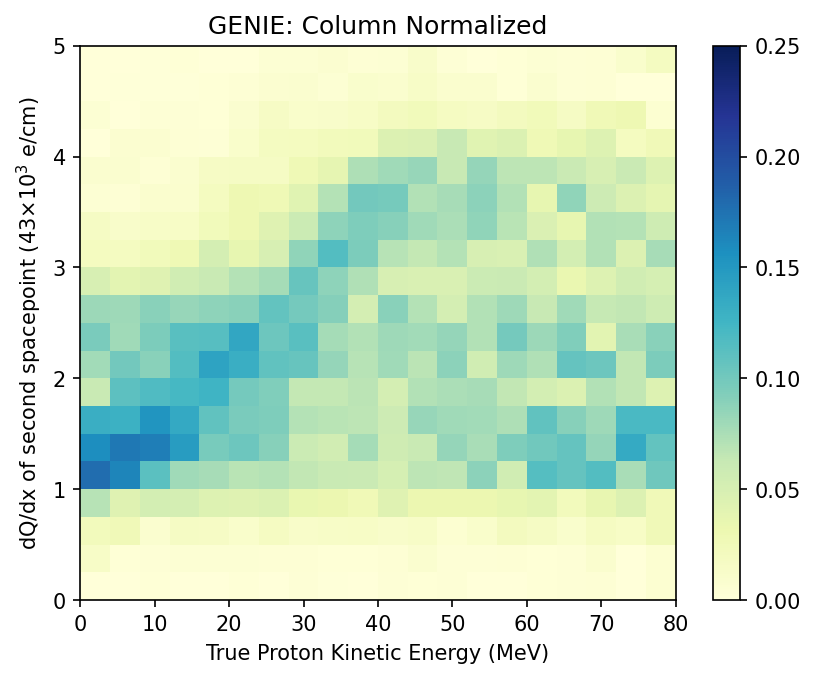

In [35]:
xmin = 0
xmax = 5
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_dq_dx_fwd_2"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(0):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"dQ/dx of second spacepoint (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.3)
    plt.colorbar(c)
    plt.xlabel(r"dQ/dx of second spacepoint (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"dQ/dx of second spacepoint (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"dQ/dx of second spacepoint (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

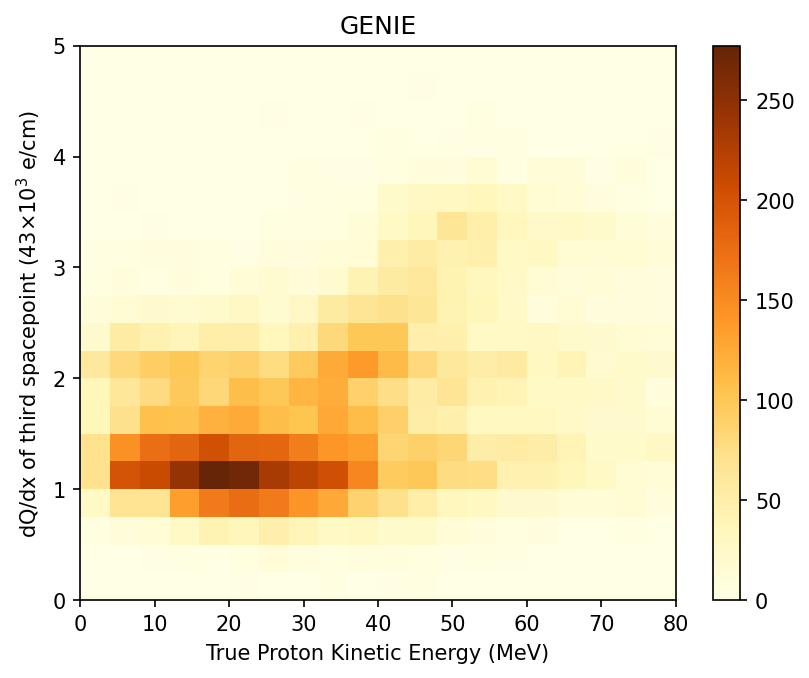

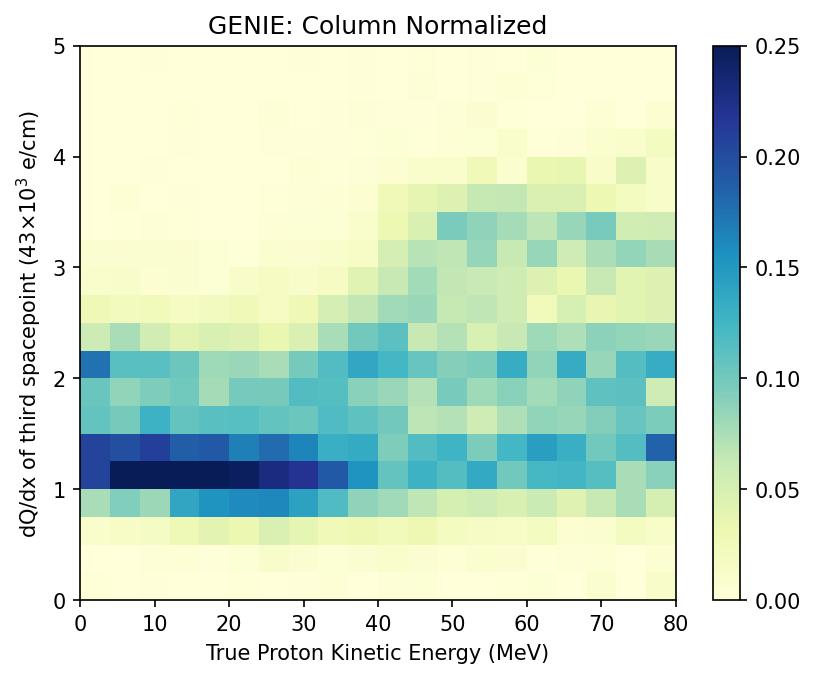

In [36]:
xmin = 0
xmax = 5
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_dq_dx_fwd_3"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(0):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"dQ/dx of first spacepoint (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.3)
    plt.colorbar(c)
    plt.xlabel(r"dQ/dx of first spacepoint (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"dQ/dx of third spacepoint (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"dQ/dx of third spacepoint (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

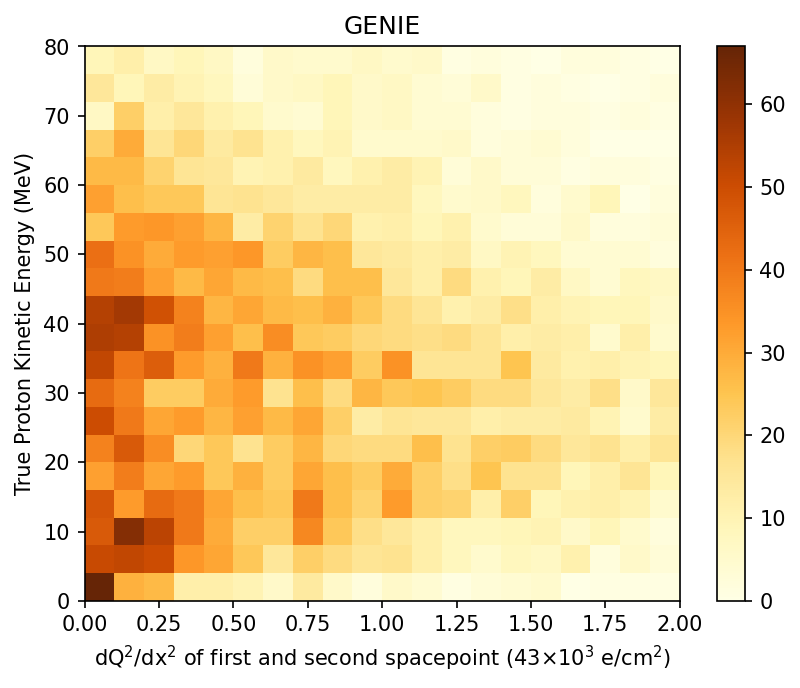

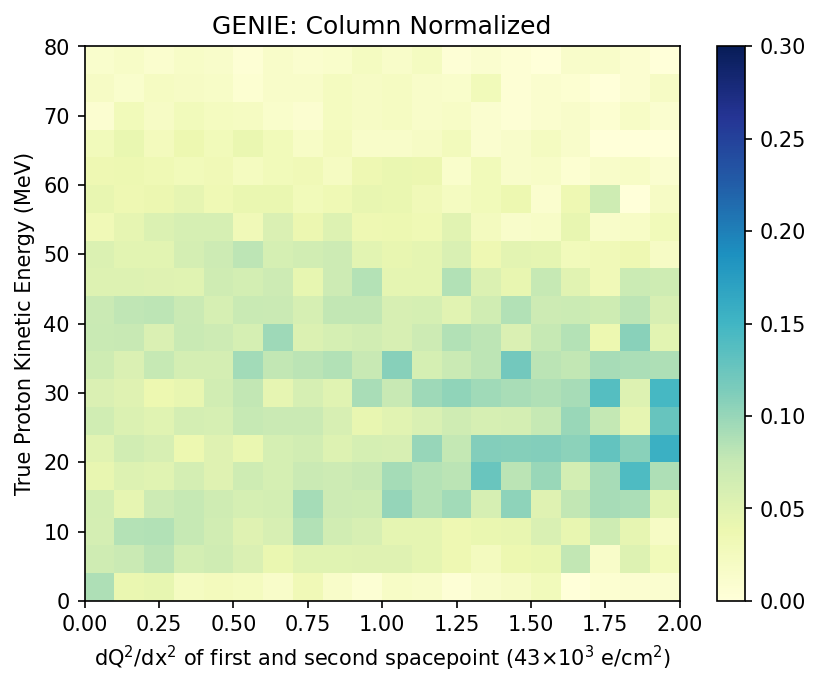

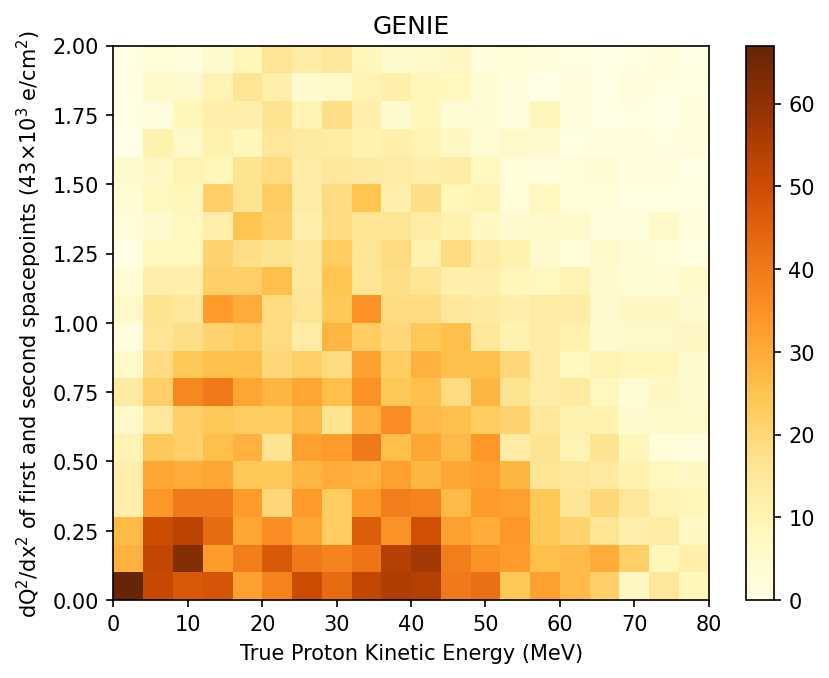

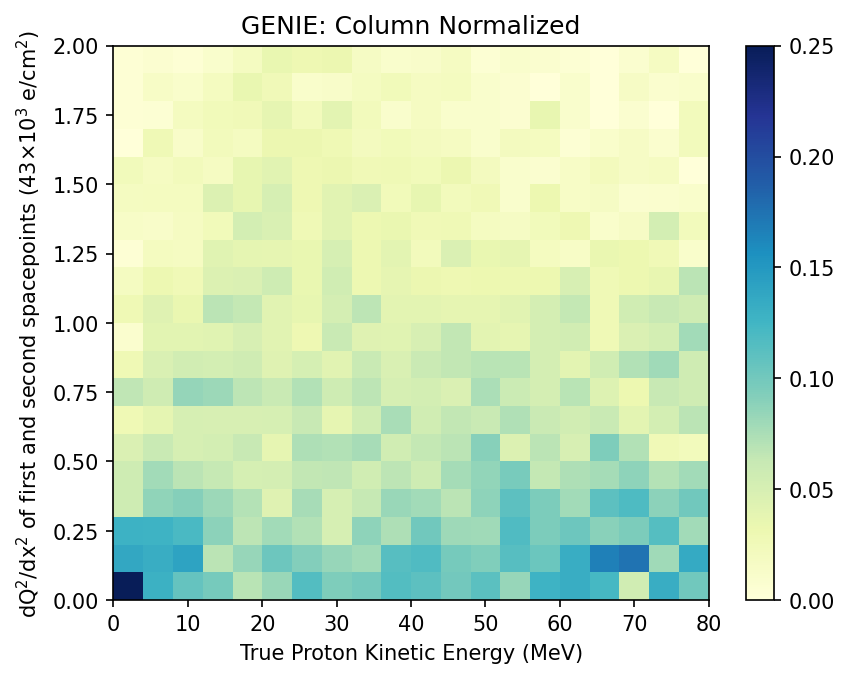

In [14]:
xmin = 0
xmax = 2
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_d_dq_dx_fwd_12"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(1):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"dQ$^2$/dx$^2$ of first and second spacepoint (43×10$^3$ e/cm$^2$)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.3)
    plt.colorbar(c)
    plt.xlabel(r"dQ$^2$/dx$^2$ of first and second spacepoint (43×10$^3$ e/cm$^2$)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"dQ$^2$/dx$^2$ of first and second spacepoints (43×10$^3$ e/cm$^2$)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"dQ$^2$/dx$^2$ of first and second spacepoints (43×10$^3$ e/cm$^2$)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

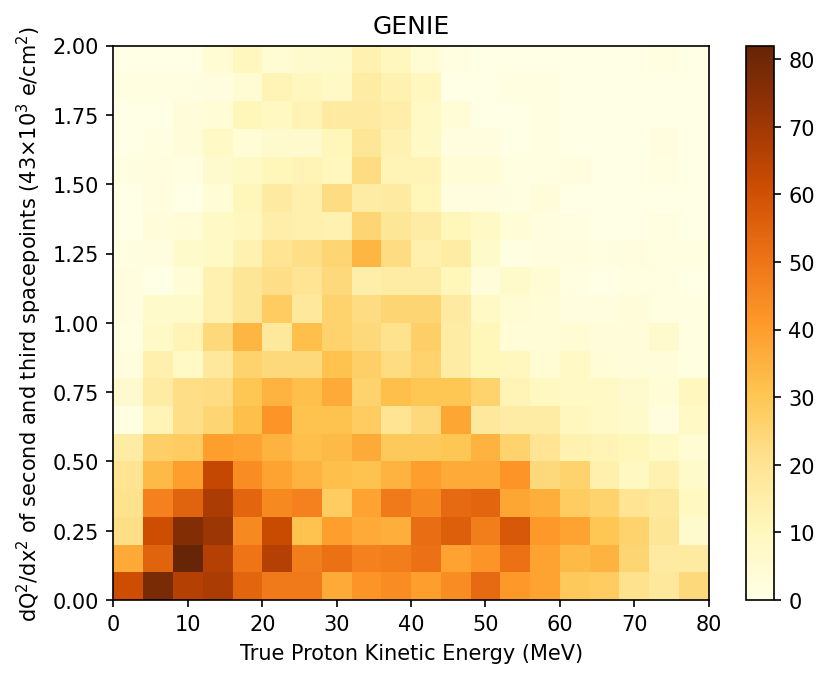

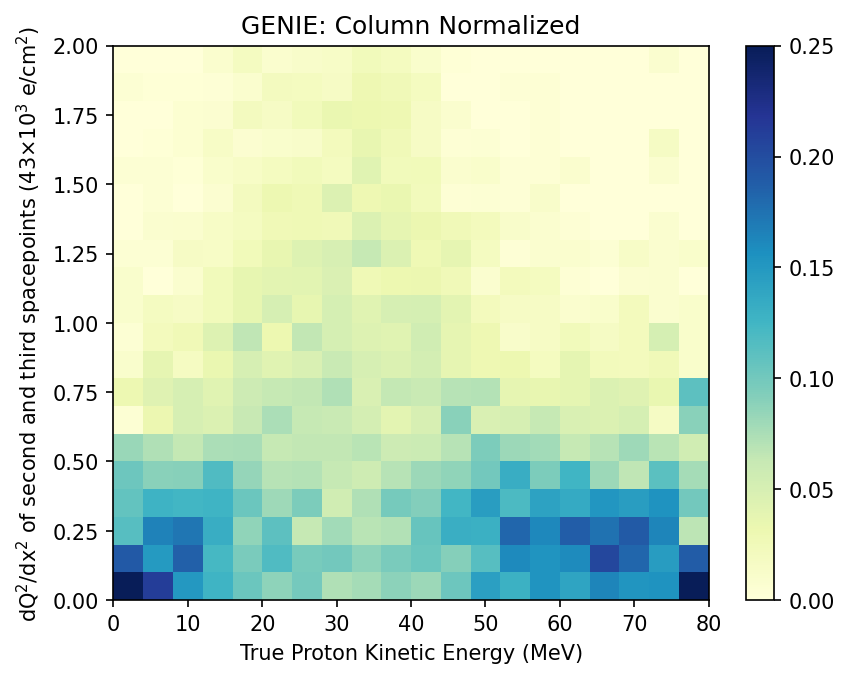

In [40]:
xmin = 0
xmax = 2
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_d_dq_dx_fwd_23"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(0):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"dQ$^2$/dx$^2$ of second and third spacepoint (43×10$^3$ e/cm$^2$)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.3)
    plt.colorbar(c)
    plt.xlabel(r"dQ$^2$/dx$^2$ of second and third spacepoint (43×10$^3$ e/cm$^2$)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"dQ$^2$/dx$^2$ of second and third spacepoints (43×10$^3$ e/cm$^2$)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"dQ$^2$/dx$^2$ of second and third spacepoints (43×10$^3$ e/cm$^2$)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

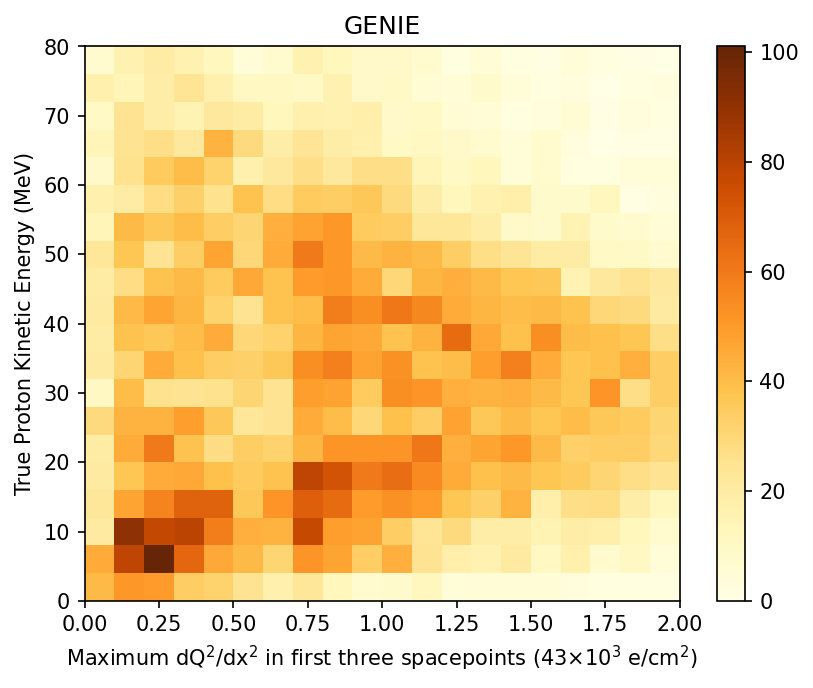

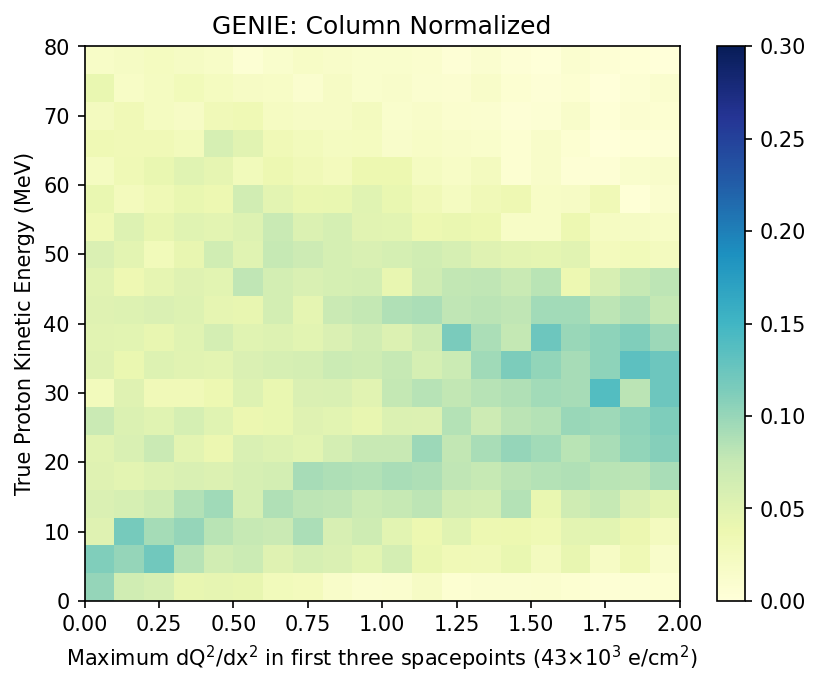

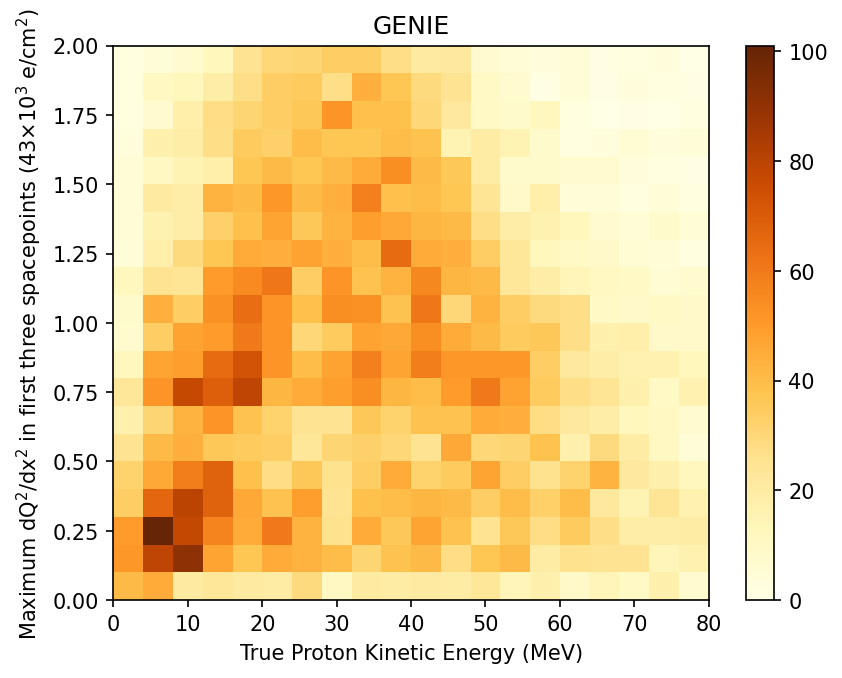

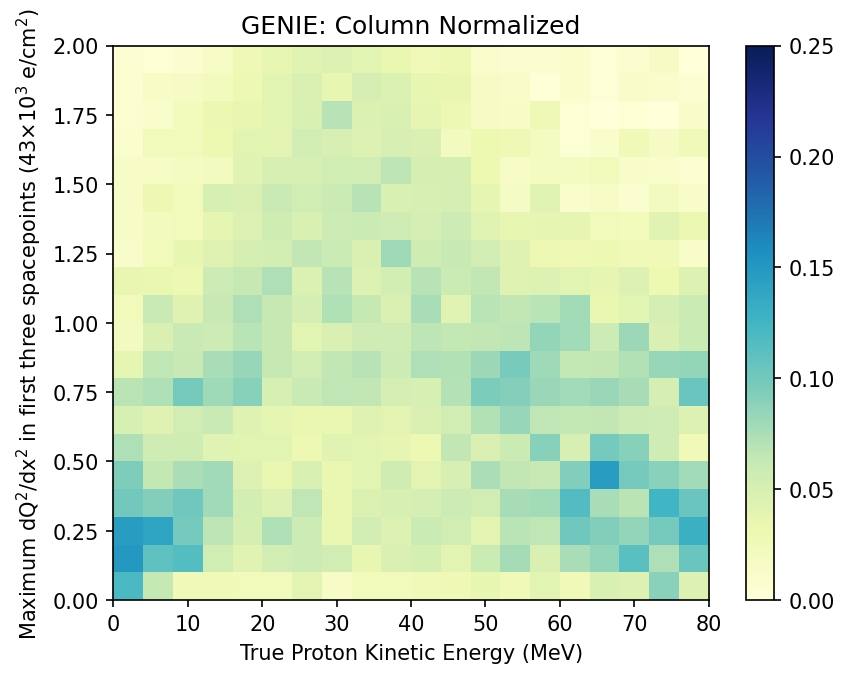

In [42]:
xmin = 0
xmax = 2
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_max_d_dq_dx_fwd_3"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(1):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"Maximum dQ$^2$/dx$^2$ in first three spacepoints (43×10$^3$ e/cm$^2$)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
    plt.colorbar(c)
    plt.xlabel(r"Maximum dQ$^2$/dx$^2$ in first three spacepoints (43×10$^3$ e/cm$^2$)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"Maximum dQ$^2$/dx$^2$ in first three spacepoints (43×10$^3$ e/cm$^2$)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"Maximum dQ$^2$/dx$^2$ in first three spacepoints (43×10$^3$ e/cm$^2$)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

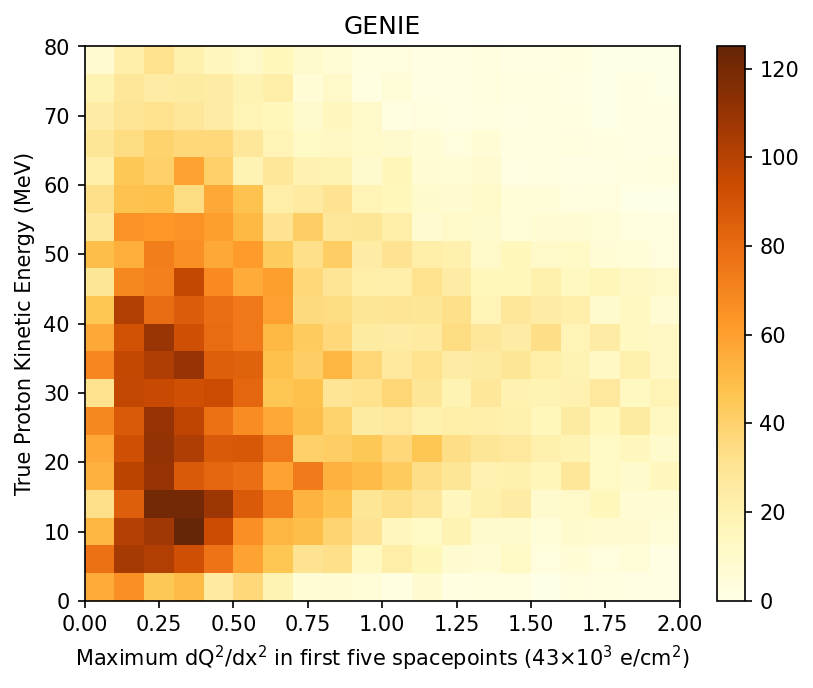

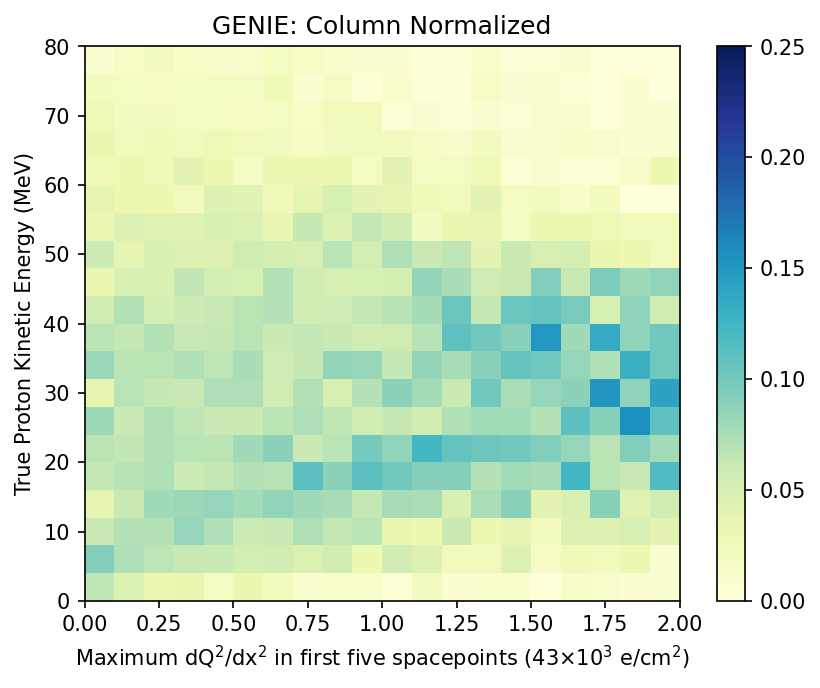

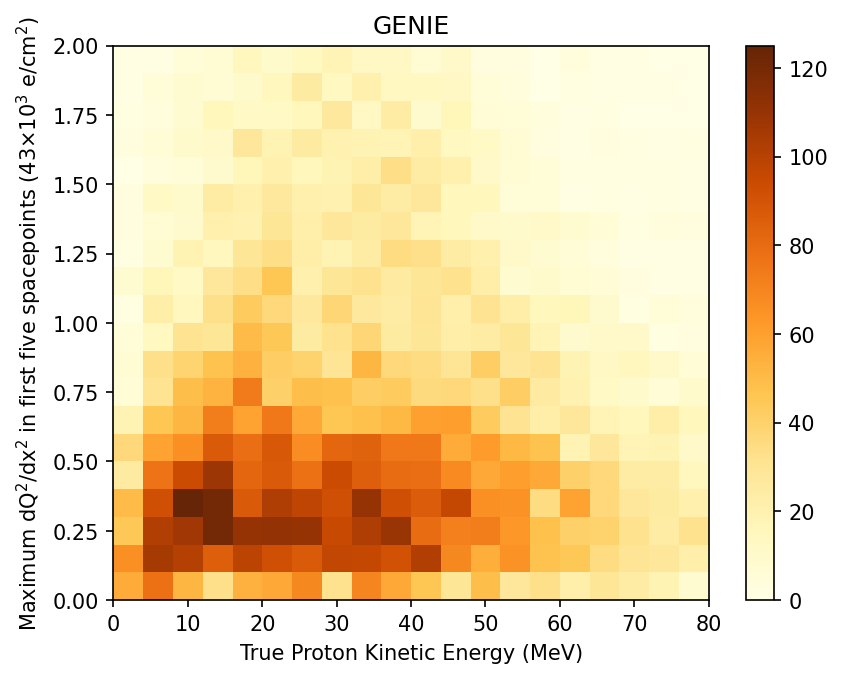

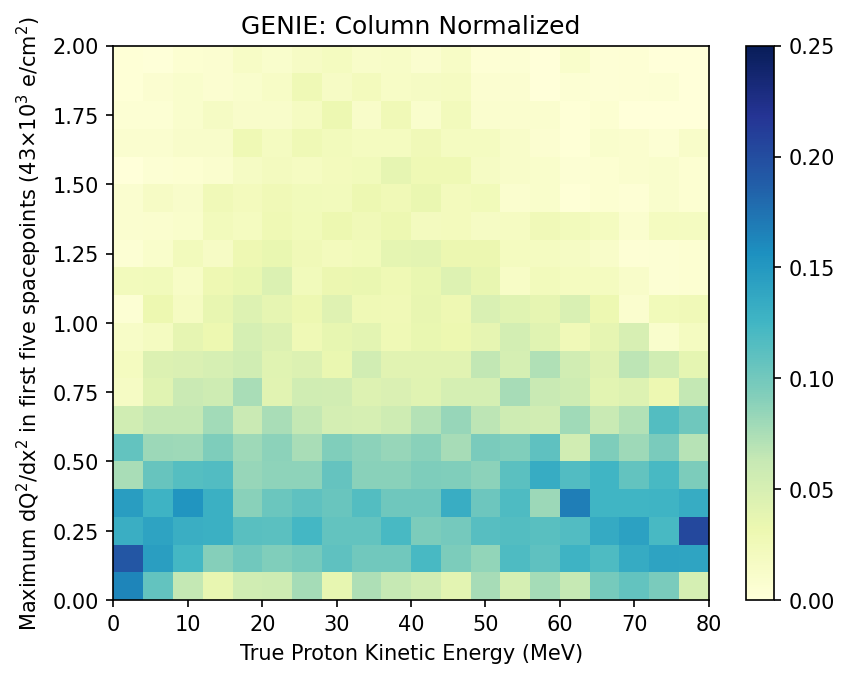

In [15]:
xmin = 0
xmax = 2
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_max_d_dq_dx_fwd_5"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(1):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"Maximum dQ$^2$/dx$^2$ in first five spacepoints (43×10$^3$ e/cm$^2$)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
    plt.colorbar(c)
    plt.xlabel(r"Maximum dQ$^2$/dx$^2$ in first five spacepoints (43×10$^3$ e/cm$^2$)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"Maximum dQ$^2$/dx$^2$ in first five spacepoints (43×10$^3$ e/cm$^2$)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"Maximum dQ$^2$/dx$^2$ in first five spacepoints (43×10$^3$ e/cm$^2$)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

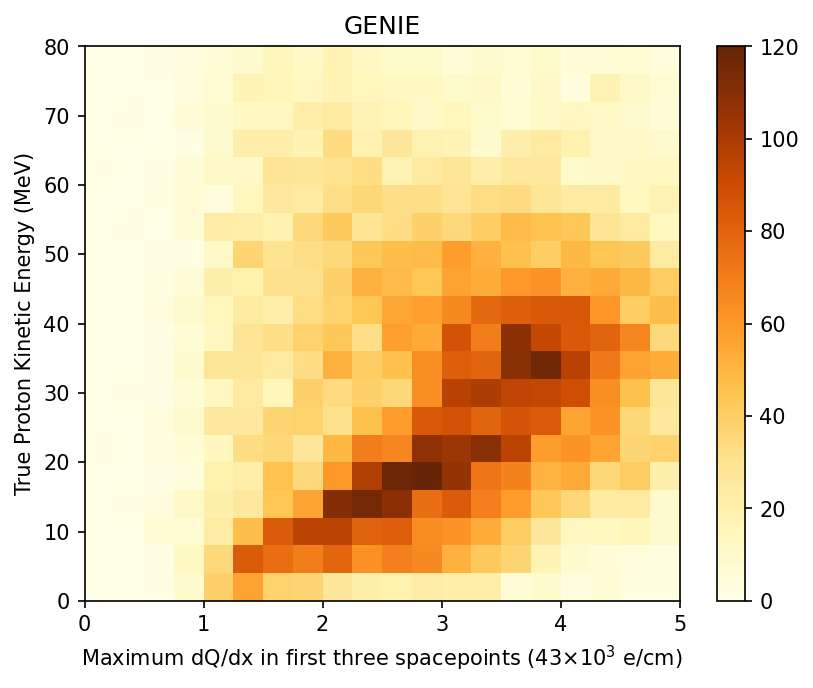

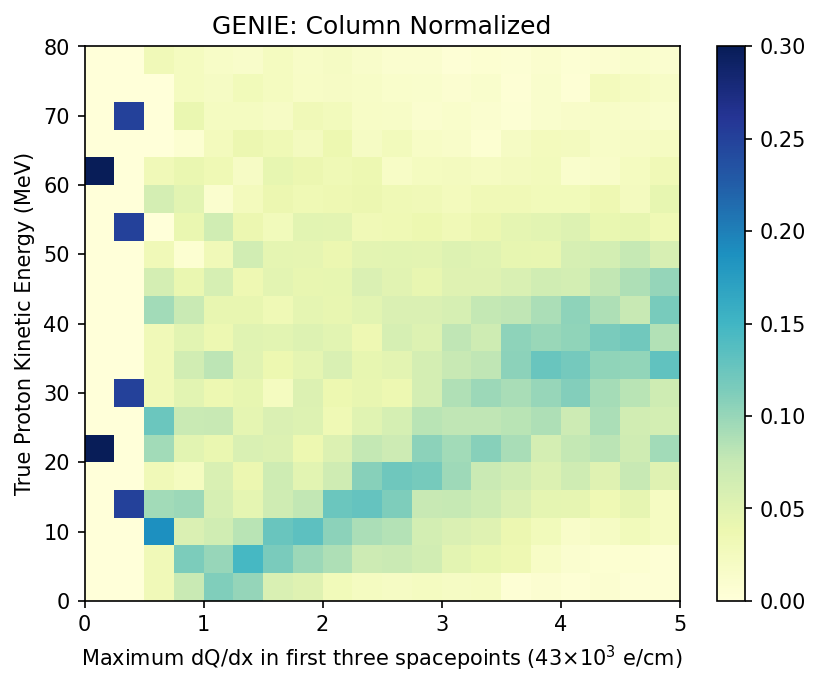

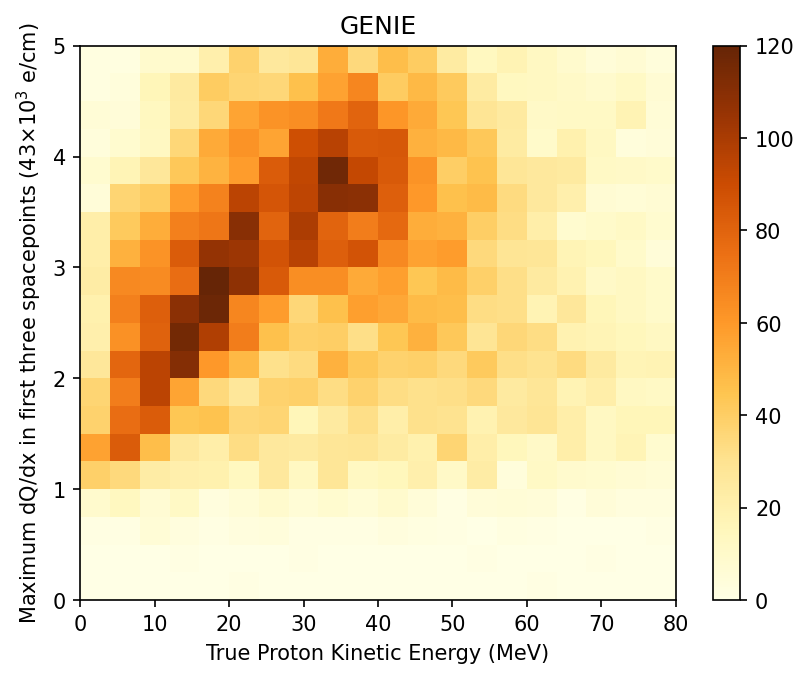

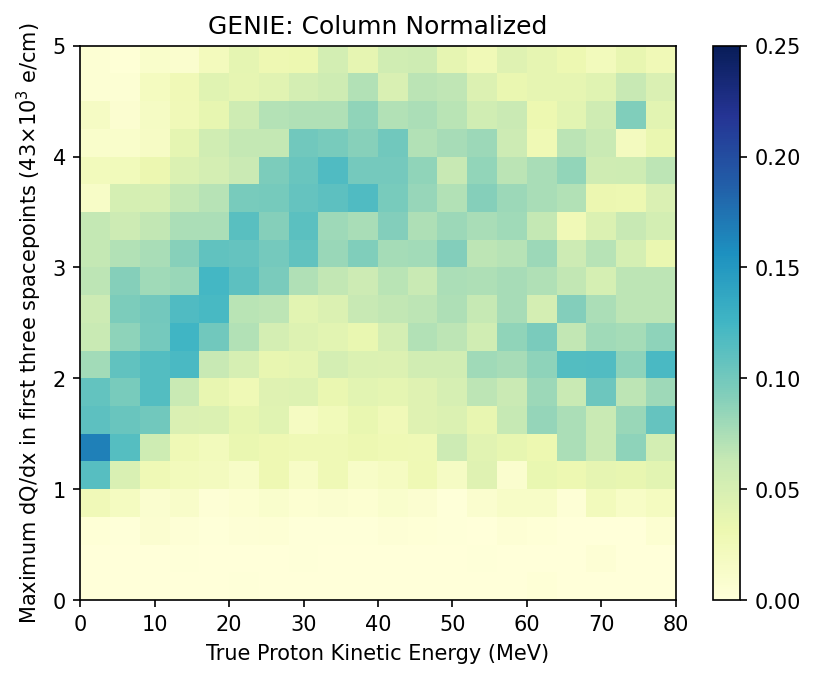

In [44]:
xmin = 0
xmax = 5
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_max_dq_dx_fwd_3"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(1):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"Maximum dQ/dx in first three spacepoints (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.3)
    plt.colorbar(c)
    plt.xlabel(r"Maximum dQ/dx in first three spacepoints (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"Maximum dQ/dx in first three spacepoints (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"Maximum dQ/dx in first three spacepoints (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

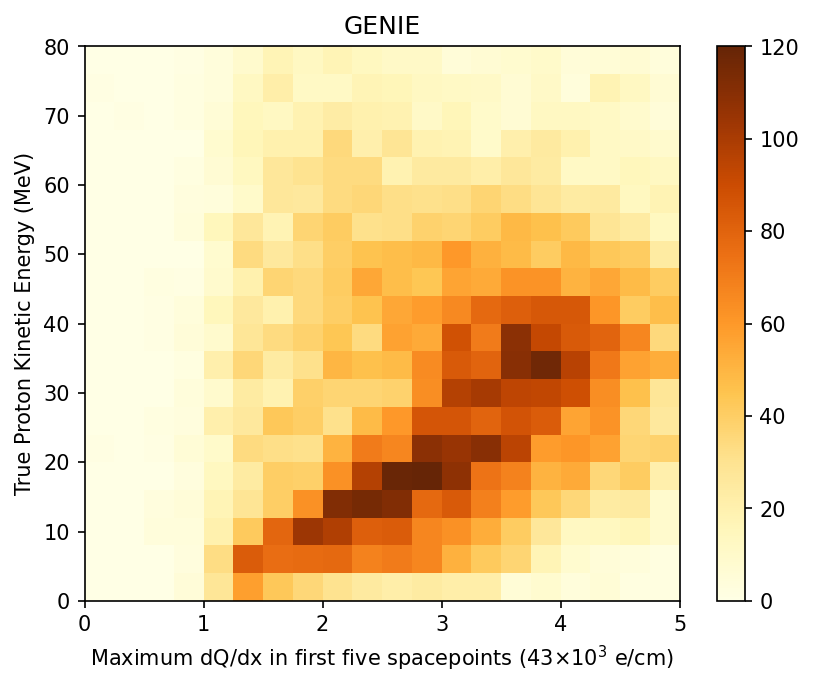

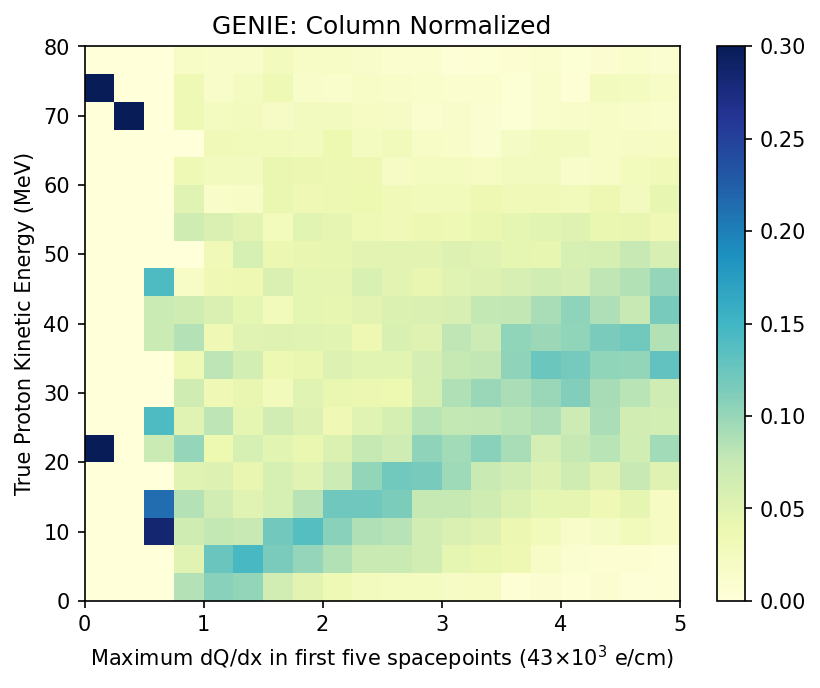

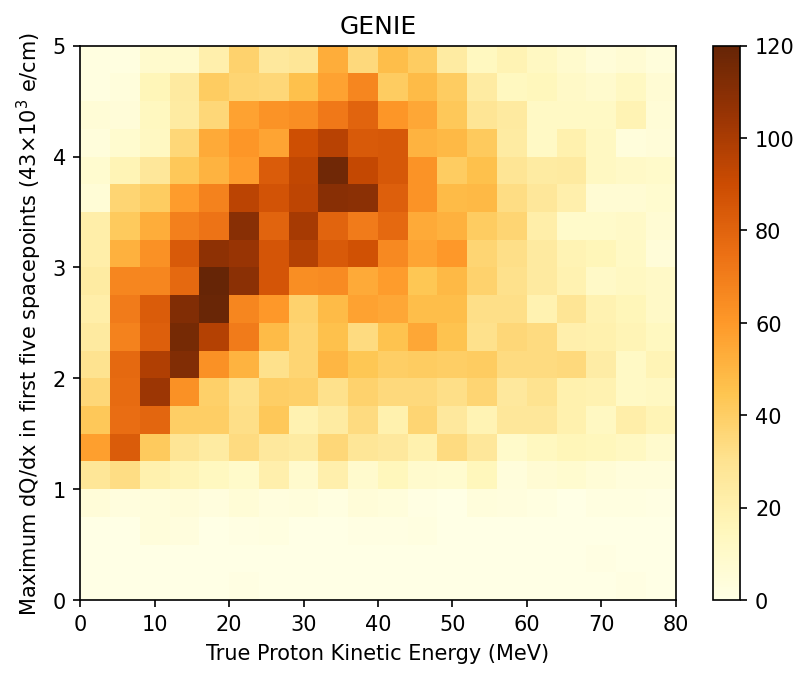

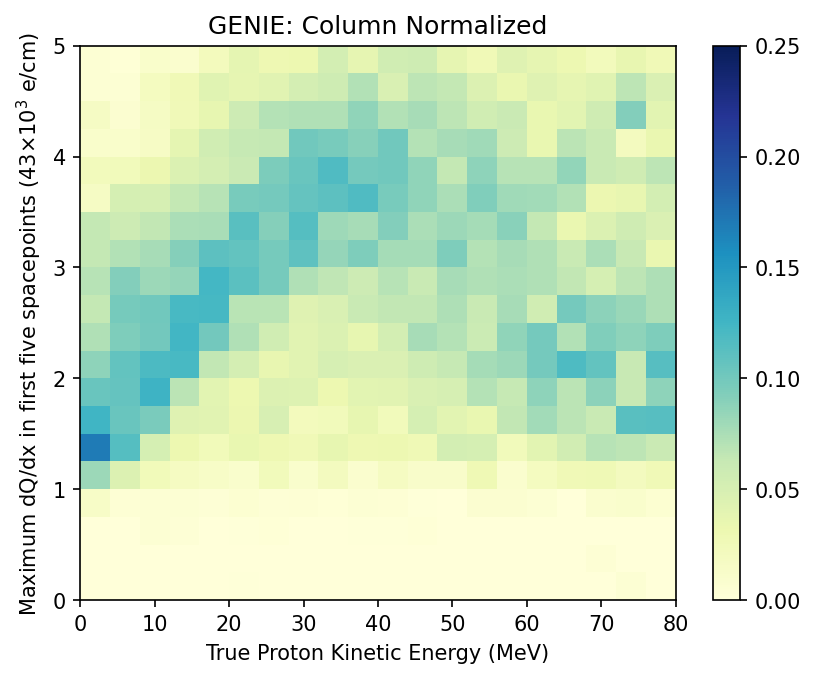

In [45]:
xmin = 0
xmax = 5
nxbins = 20
ymin = 0
ymax = 80
nybins = 20

x_events = kdar_overlay_df.query(presel_query)["ssm_max_dq_dx_fwd_5"].to_numpy()

y_events = kdar_overlay_df.query(presel_query)["truth_prim_p_energy"].to_numpy()

if(1):
    dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
    plt.figure(dpi=150)
    plt.title("GENIE")
    c = plt.pcolormesh(x, y, dist.T,cmap='YlOrBr')
    plt.colorbar(c)
    plt.xlabel(r"Maximum dQ/dx in first five spacepoints (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()
    
    
    row_sum = dist.sum(axis=1)
    plt.figure(dpi=150)
    plt.title("GENIE: Column Normalized")
    c = plt.pcolormesh(x, y, (dist).T/row_sum,cmap='YlGnBu',vmin=0,vmax=0.3)
    plt.colorbar(c)
    plt.xlabel(r"Maximum dQ/dx in first five spacepoints (43×10$^3$ e/cm)")
    plt.ylabel("True Proton Kinetic Energy (MeV)")
    plt.show()

dist, x, y = np.histogram2d(x_events,y_events,range=((xmin,xmax),(ymin,ymax)),bins=(nxbins,nybins))
plt.figure(dpi=150)
plt.title("GENIE")
c = plt.pcolormesh(y, x, dist,cmap='YlOrBr')
plt.colorbar(c)
plt.ylabel(r"Maximum dQ/dx in first five spacepoints (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()

row_sum = dist.sum(axis=0)
plt.figure(dpi=150)
plt.title("GENIE: Column Normalized")
c = plt.pcolormesh(y, x, dist/row_sum,cmap='YlGnBu',vmin=0,vmax=0.25)
plt.colorbar(c)
plt.ylabel(r"Maximum dQ/dx in first five spacepoints (43×10$^3$ e/cm)")
plt.xlabel("True Proton Kinetic Energy (MeV)")
plt.show()